**GRUPO 2**

> **Integrantes**:
>
> - Roberto Perez Esteban
> - Sofia Gomez Ramirez
> - Agustin Arganin Castillo

Proyecto de análisis exploratorio de datos de inmuebles

In [1]:
import csv
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy
import seaborn as sns

pd.options.mode.copy_on_write = True

# Proyecto EDA
## Análisis de Viviendas

In [108]:
print(os.getcwd())

c:\Users\asgr2\Desktop\Bootcamp_DS\EDA_Inmuebles_Idealista\src\notebooks


Función para rastrear directorios y archivos en ellos.

In [109]:
def check_extension(path):
	if fnmatch.fnmatch(path, "*.csv"):
		return ("csv", pd.read_csv(path))
	if fnmatch.fnmatch(path, "*.json"):
		return ("json", pd.read_json(path))
	if fnmatch.fnmatch(path, "*.txt"):
		return "txt"
	if fnmatch.fnmatch(path, "*.xlsx"):
		return ("xlsx", pd.read_excel(path))


def load_file(path, data):
	if not os.path.isfile(path):
		raise ValueError("La ruta es un archivo.")

	extension, dataset = check_extension(path)
	data[extension] = dataset

	return extension

In [110]:
path = os.getcwd()
def load_datasets(path, data):
	print("Current Working Directory:\n\t-", path)
	if path is None or path == "":
		raise ValueError("Ruta inválida o inexistente.")

	if os.path.isfile(path):
		load_file(path, data)
	elif not os.path.isdir(path):
		raise ValueError(f"El path no corresponde a un directorio o archivo. Path: {path}")

	with os.scandir(path) as directories:
		for directory in directories:
			try:
				dir = f"{path}/{directory.name}"
				os.chdir(dir)
				load_datasets(f"{path}/{directory.name}", data)
			except Exception as e:
				raise ValueError("Error:", e)

In [111]:
os.getcwd()

'c:\\Users\\asgr2\\Desktop\\Bootcamp_DS\\EDA_Inmuebles_Idealista\\src\\notebooks'

In [2]:
datasets = []
base_path = "../data"

### Cargar datos de múltiples datasets
#### 21-04-2023

Dentro de la carpeta encontramos archivos `.txt` y `.csv`.

In [113]:
path = f"{base_path}/23-04-21"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/23-04-21
['23-04-21 Descarga Idealista.txt', '23-04-21Datos2000(4).csv']


##### Archivo: **23-04-21 Descarga Idealista.txt**

Cargamos el dataset.

In [114]:
dir = f"{path}/{files[0]}"
print("Directory:", dir)
with open(dir, "r", encoding="utf-8") as file:
	line = file.read()
	json_data = json.loads(line)

data = pd.DataFrame(json_data)
data.sample(5)

Directory: ../data/23-04-21/23-04-21 Descarga Idealista.txt


,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,superTopHighlight,labels,newDevelopmentFinished
461,98278918,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2206020,33,4,460000.0,flat,sale,82.0,False,...,"{'subtitle': 'Nuevos Ministerios-Ríos Rosas, M...",True,False,True,True,{'groupDescription': 'Top'},False,False,NaN,NaN
1092,100421005,https://img3.idealista.com/blur/WEB_LISTING/0/...,jy3,61,6,1770000.0,penthouse,sale,230.0,True,...,"{'subtitle': 'Goya, Madrid', 'title': 'Ático e...",True,True,False,True,{'groupDescription': 'Top'},False,False,NaN,NaN
930,100548887,https://img3.idealista.com/blur/WEB_LISTING/0/...,BHHS-005553,35,5,850000.0,flat,sale,106.0,False,...,"{'subtitle': 'Ibiza, Madrid', 'title': 'Piso'}",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
99,100825110,https://img3.idealista.com/blur/WEB_LISTING/0/...,MG184134,30,2,298000.0,flat,sale,43.0,False,...,"{'subtitle': 'Argüelles, Madrid', 'title': 'Pi...",False,True,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
810,99677256,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,28,bj,780000.0,flat,sale,432.0,True,...,"{'subtitle': 'Costillares, Madrid', 'title': '...",True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN


Análizamos brevemente lo que posee, pero antes desarrollamos una función que nos ayude a agilizar el proceso.

In [3]:
def basic_dataset_info(dataset):
	rows = len(dataset)
	cols = len(dataset.columns)

	print(f"Información de dataset: {rows} registros, {cols} columnas")
	print("Revisión de columnas del dataset:")
	print("="*60)

	columns = dataset.columns
	for column in columns:
		print(f"\t-{column} ({dataset[column].dtype}):")

		nulos = dataset[column].isna().sum()
		print(f"\t\t-Registros nulos: {nulos} ({nulos/rows * 100:.3f}%)")

		cardinality = len(dataset[column].value_counts())/rows
		print(f"\t\t-Cardinalidad: {cardinality * 100:.3f}%")

Desarrollamos una función para extraer información básica del dataset.

In [116]:
basic_dataset_info(data)

Información de dataset: 1192 registros, 41 columnas
Revisión de columnas del dataset:
	-propertyCode (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 89.346%
	-thumbnail (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.591%
	-externalReference (object):
		-Registros nulos: 65 (5.453%)
		-Cardinalidad: 83.305%
	-numPhotos (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 6.963%
	-floor (object):
		-Registros nulos: 134 (11.242%)
		-Cardinalidad: 1.678%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.171%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.419%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 26.594%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.168%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.839%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinali

In [117]:
datasets.append(data)

##### Archivo: **23-04-21Datos2000(4).csv**

In [118]:
dir = f"{path}/{files[1]}"
#dir = f"{base_path}/23-04-21/{files[1]}"
print("Directory:", dir)
pd.read_csv(dir)

Directory: ../data/23-04-21/23-04-21Datos2000(4).csv


,latitude,longitude
0,40.474176,-3.718524
1,40.473012,-3.721207
2,40.469095,-3.716839
3,40.471575,-3.719830
4,40.473213,-3.720713
...,...,...
1187,40.384186,-3.671609
1188,40.384380,-3.668888
1189,40.384115,-3.670471
1190,40.382617,-3.667895


Cómo vemos, este archivo posee información que no vamos a poder asociar a ningún inmueble.

#### 20-05-2023

Dentro de la carpeta encontramos una variedad de archivos: `.txt`, `.csv` , `.xlsx`.

In [119]:
path = f"{base_path}/23-05-20"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/23-05-20
['DatosDescarga.csv', 'DatosDescarga2(1) - nuda.csv', 'DatosDescarga2(1).csv', 'Listado.txt', 'Verificaciones.xlsx', 'Verificación 2.csv']


##### Archivo: **DatosDescarga2(1).csv**

In [120]:
dir = f"{path}/{files[2]}"
print("Directory:", dir)
data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-05-20/DatosDescarga2(1).csv


,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
342,342,100377796,378000.0,flat,sale,86.0,True,3,1,valencia,...,False,1,True,NaN,flat,NaN,Piso en valencia,"Lavapiés-Embajadores, Madrid",NaN,NaN
523,523,100425420,850000.0,flat,sale,123.0,True,1,1,barrio Malasaña-Universidad,...,False,1,False,NaN,flat,NaN,Piso,"Malasaña-Universidad, Madrid",NaN,NaN
717,717,100300746,515000.0,flat,sale,76.0,False,2,1,Calle MARQUES DE CUBAS,...,False,1,True,NaN,flat,NaN,Piso en Calle Marques De Cubas,"Huertas-Cortes, Madrid",NaN,NaN
865,865,97162161,790000.0,flat,sale,117.0,True,3,2,barrio El Viso,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"El Viso, Madrid",True,True
685,685,99912724,2300000.0,penthouse,sale,370.0,True,3,4,barrio Almagro,...,False,6,True,NaN,flat,penthouse,Ático,"Almagro, Madrid",NaN,NaN


In [121]:
basic_dataset_info(data)

Información de dataset: 1196 registros, 37 columnas
Revisión de columnas del dataset:
	-Unnamed: 0 (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 100.000%
	-propertyCode (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.294%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.629%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.418%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 25.669%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.167%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.836%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.669%
	-address (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 49.666%
	-province (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-municipality (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.

In [122]:
datasets.append(data)

##### Archivo: **Listado.txt**

In [123]:
dir = f"{path}/{files[3]}"
print("Directory:", dir)
with open(dir, "r", encoding="utf-8") as file:
	line = file.read()
	json_data = json.loads(line)

data = pd.DataFrame(json_data)
data.sample(5)

Directory: ../data/23-05-20/Listado.txt


,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,superTopHighlight,topNewDevelopment,labels,newDevelopmentFinished
1031,101196851,https://img3.idealista.com/blur/WEB_LISTING/0/...,AG02167,46,en,598000.0,flat,sale,123.0,True,...,"{'subtitle': 'Nueva España, Madrid', 'title': ...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
1125,100819242,https://img3.idealista.com/blur/WEB_LISTING/0/...,FRP-4300,25,4,580000.0,flat,sale,153.0,True,...,"{'subtitle': 'Estrella, Madrid', 'title': 'Pis...",False,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
1068,101483547,https://img3.idealista.com/blur/WEB_LISTING/0/...,PR0472,19,1,425000.0,flat,sale,93.0,True,...,"{'subtitle': 'Prosperidad, Madrid', 'title': '...",False,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
283,95574616,https://img3.idealista.com/blur/WEB_LISTING/0/...,MG166364,51,3,1350000.0,flat,sale,170.0,True,...,"{'subtitle': 'Trafalgar, Madrid', 'title': 'Pi...",True,True,False,True,{'groupDescription': 'Top'},False,False,NaN,NaN
797,97958060,https://img3.idealista.com/blur/WEB_LISTING/0/...,AR174891,29,NaN,1100000.0,chalet,sale,187.0,False,...,"{'subtitle': 'Castilla, Madrid', 'title': 'Cas...",False,True,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN


In [124]:
basic_dataset_info(data)

Información de dataset: 1196 registros, 41 columnas
Revisión de columnas del dataset:
	-propertyCode (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.294%
	-thumbnail (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 87.542%
	-externalReference (object):
		-Registros nulos: 68 (5.686%)
		-Cardinalidad: 81.773%
	-numPhotos (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 7.274%
	-floor (object):
		-Registros nulos: 117 (9.783%)
		-Cardinalidad: 1.672%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.629%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.418%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 25.669%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.167%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.836%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalid

In [125]:
datasets.append(data)

##### Archivo: **Verificaciones.xlsx**

In [126]:
dir = f"{path}/{files[4]}"
print("Directory:", dir)

data = pd.read_excel(dir)
data.sample(5)

Directory: ../data/23-05-20/Verificaciones.xlsx


,Unnamed: 0,Unnamed: 1
807,100965538,1
939,101141483,2
117,97564598,2
1159,101390156,1
1168,101399590,2


##### Archivo: **DatosDescarga.csv**

In [127]:
dir = f"{path}/{files[0]}"
print("Directory:", dir)

data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-05-20/DatosDescarga.csv


,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,newDevelopment.1,priceByArea,detailedType,suggestedTexts,hasPlan,topNewDevelopment,superTopHighlight,floor,hasLift,parkingSpace
292,292,101475584,999000.0,flat,sale,154.0,True,4,3,Calle de Gaztambide,...,False,6487.0,{'typology': 'flat'},"{'subtitle': 'Gaztambide, Madrid', 'title': 'P...",True,False,False,3,True,NaN
264,264,99794116,1090000.0,flat,sale,268.0,True,5,3,Paseo de San Francisco de Sales,...,False,4067.0,{'typology': 'flat'},"{'subtitle': 'Vallehermoso, Madrid', 'title': ...",True,False,False,13,True,NaN
677,677,97740848,6950000.0,penthouse,sale,688.0,True,5,6,barrio Castellana,...,False,10102.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Castellana, Madrid', 'title': 'Á...",True,False,False,7,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
312,312,98062388,430000.0,flat,sale,87.0,True,2,1,Calle del Tesoro,...,False,4943.0,{'typology': 'flat'},"{'subtitle': 'Malasaña-Universidad, Madrid', '...",True,False,False,3,False,NaN
304,304,100820685,790000.0,flat,sale,102.0,True,2,2,barrio Malasaña-Universidad,...,False,7745.0,{'typology': 'flat'},"{'subtitle': 'Malasaña-Universidad, Madrid', '...",True,False,False,NaN,NaN,NaN


In [128]:
basic_dataset_info(data)

Información de dataset: 1196 registros, 31 columnas
Revisión de columnas del dataset:
	-Unnamed: 0 (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 100.000%
	-propertyCode (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.294%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.629%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.418%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 25.669%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.167%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.836%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.669%
	-address (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 49.666%
	-province (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-municipality (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.

In [129]:
datasets.append(data)

##### Archivo: **Verificación 2.csv**

In [130]:
dir = f"{path}/{files[5]}"
print("Directory:", dir)

data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-05-20/Verificación 2.csv


,ex,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,n�mero de veces
837,1066.0,100755580.0,660000.0,flat,sale,171.0,True,4.0,2.0,barrio Guindalera,...,1,True,NaN,flat,NaN,Piso,"Guindalera, Madrid",NaN,NaN,1.0
390,823.0,99303951.0,2485000.0,flat,sale,219.0,True,3.0,2.0,"Paseo de la habana, 147",...,bj,True,NaN,flat,NaN,"Piso en Paseo de la habana, 147","Nueva España, Madrid",NaN,NaN,1.0
1998,318.0,103076327.0,950000.0,flat,sale,135.0,True,2.0,3.0,Calle Santa Clara,...,2,True,NaN,flat,NaN,Piso en Calle Santa Clara,"Palacio, Madrid",NaN,NaN,1.0
1315,559.0,101335218.0,410000.0,flat,sale,85.0,True,2.0,2.0,Calle del Labrador,...,1,True,NaN,flat,NaN,Piso en Calle del Labrador,"Acacias, Madrid",NaN,NaN,1.0
1175,594.0,101188973.0,168000.0,studio,sale,33.0,True,0.0,1.0,Calle de Jaime el Conquistador,...,NaN,True,NaN,flat,studio,Estudio en Calle de Jaime el Conquistador,"Chopera, Madrid",NaN,NaN,1.0


In [131]:
basic_dataset_info(data)

Información de dataset: 2395 registros, 37 columnas
Revisión de columnas del dataset:
	-ex (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 50.021%
	-propertyCode (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 83.257%
	-price (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 27.641%
	-propertyType (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.209%
	-operation (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.042%
	-size (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 14.990%
	-exterior (object):
		-Registros nulos: 66 (2.756%)
		-Cardinalidad: 0.084%
	-rooms (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.459%
	-bathrooms (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.376%
	-address (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 39.499%
	-province (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.042%
	-municipality (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 

In [132]:
datasets.append(data)

##### Archivo: **DatosDescarga2(1) - nuda.csv**

In [133]:
dir = f"{path}/{files[2]}"
print("Directory:", dir)

data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-05-20/DatosDescarga2(1).csv


,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
611,611,100280648,1140000.0,flat,sale,240.0,True,5,3,Paseo de la Castellana,...,False,4,True,NaN,flat,NaN,Piso en Paseo de la Castellana,"Cuzco-Castillejos, Madrid",NaN,NaN
856,856,101073009,1320000.0,flat,sale,179.0,True,4,3,barrio El Viso,...,False,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"El Viso, Madrid",True,True
537,537,101145538,335000.0,flat,sale,83.0,True,2,1,"Calle de Jesús y María,",...,False,1,False,NaN,flat,NaN,"Piso en Calle de Jesús y María,","Lavapiés-Embajadores, Madrid",NaN,NaN
1077,1077,101062099,995000.0,flat,sale,206.0,True,5,3,Calle del Doctor Gómez Ulla,...,False,2,True,NaN,flat,NaN,Piso en Calle del Doctor Gómez Ulla,"Guindalera, Madrid",NaN,NaN
632,632,100624857,774900.0,flat,sale,142.0,True,4,3,Calle de Orense,...,False,7,True,NaN,flat,NaN,Piso en Calle de Orense,"Cuzco-Castillejos, Madrid",NaN,NaN


In [134]:
basic_dataset_info(data)

Información de dataset: 1196 registros, 37 columnas
Revisión de columnas del dataset:
	-Unnamed: 0 (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 100.000%
	-propertyCode (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.294%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.629%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.418%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 25.669%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.167%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.836%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.669%
	-address (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 49.666%
	-province (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-municipality (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.

In [135]:
datasets.append(data)

#### 19-06-2023

In [136]:

path = f"{base_path}/23-05-20"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/23-05-20
['DatosDescarga.csv', 'DatosDescarga2(1) - nuda.csv', 'DatosDescarga2(1).csv', 'Listado.txt', 'Verificaciones.xlsx', 'Verificación 2.csv']


In [137]:
path = f"{base_path}/23-06-19"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/23-06-19
['DatosDescarga.csv', 'DatosDescarga2 - nuda.csv', 'DatosDescarga2.csv', 'Listado.txt']


##### Archivo: **Listado.txt**

In [138]:
dir = f"{path}/{files[3]}"
print("Directory:", dir)
with open(dir, "r", encoding="utf-8") as file:
	line = file.read()
	json_data = json.loads(line)

data = pd.DataFrame(json_data)
data.sample(5)

Directory: ../data/23-06-19/Listado.txt


,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,superTopHighlight,labels,newDevelopmentFinished
8,99154036,https://img3.idealista.com/blur/WEB_LISTING/0/...,ATICO DOS TERRAZAS,72,5,850000.0,penthouse,sale,127.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,True,False,False,{'groupDescription': 'Destacado'},False,False,"[{'name': 'withViews', 'text': 'Con vistas'}]",NaN
682,101511804,https://img3.idealista.com/blur/WEB_LISTING/0/...,SG186219,51,8,2980000.0,penthouse,sale,281.0,True,...,"{'subtitle': 'Almagro, Madrid', 'title': 'Ático'}",True,True,False,False,{'groupDescription': 'Top'},False,False,"[{'name': 'luxuryType', 'text': 'Lujo'}]",NaN
400,100195612,https://img3.idealista.com/blur/WEB_LISTING/0/...,Bajo A,13,bj,296000.0,flat,sale,76.0,True,...,"{'subtitle': 'Valdeacederas, Madrid', 'title':...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,False
331,89977868,https://img3.idealista.com/blur/WEB_LISTING/0/...,JL149922,50,4,695000.0,flat,sale,131.0,True,...,"{'subtitle': 'Sol, Madrid', 'title': 'Piso'}",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
1002,99812444,https://img3.idealista.com/blur/WEB_LISTING/0/...,W-02QSZU,25,NaN,400000.0,flat,sale,53.0,True,...,"{'subtitle': 'Costillares, Madrid', 'title': '...",False,False,False,False,{'groupDescription': 'Top'},False,False,"[{'name': 'apartamentoType', 'text': 'Apartame...",NaN


In [139]:
basic_dataset_info(data)

Información de dataset: 1194 registros, 41 columnas
Revisión de columnas del dataset:
	-propertyCode (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.526%
	-thumbnail (object):
		-Registros nulos: 1 (0.084%)
		-Cardinalidad: 87.856%
	-externalReference (object):
		-Registros nulos: 74 (6.198%)
		-Cardinalidad: 82.412%
	-numPhotos (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 7.370%
	-floor (object):
		-Registros nulos: 111 (9.296%)
		-Cardinalidad: 1.759%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.693%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.419%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 26.214%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.168%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.838%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalid

In [140]:
datasets.append(data)

##### Archivo: **DatosDescarga.csv**

In [141]:
dir = f"{path}/{files[0]}"
print("Directory:", dir)

data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-06-19/DatosDescarga.csv


,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,newDevelopment.1,priceByArea,detailedType,suggestedTexts,hasPlan,topNewDevelopment,superTopHighlight,floor,hasLift,parkingSpace
1023,1023,101664645,2800000.0,chalet,sale,565.0,False,6,6,barrio Bernabéu-Hispanoamérica,...,False,4956.0,"{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Bernabéu-Hispanoamérica, Madrid'...",True,False,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
522,522,100936649,1600000.0,penthouse,sale,209.0,True,2,2,barrio Chueca-Justicia,...,False,7656.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Chueca-Justicia, Madrid', 'title...",True,False,False,5,True,NaN
144,144,101509122,522000.0,flat,sale,80.0,True,2,2,"Calle Ronda de Segovia, 15",...,True,6525.0,{'typology': 'flat'},"{'subtitle': 'Palacio, Madrid', 'title': 'Piso...",True,False,False,1,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
668,668,97930749,4350000.0,flat,sale,475.0,True,5,6,barrio Castellana,...,False,9158.0,{'typology': 'flat'},"{'subtitle': 'Castellana, Madrid', 'title': 'P...",False,False,False,4,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1005,1005,99400319,1255500.0,flat,sale,267.0,False,3,3,"Calle de Mesena, 80",...,True,4702.0,{'typology': 'flat'},"{'subtitle': 'Pinar del Rey, Madrid', 'title':...",True,False,False,bj,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."


In [142]:
basic_dataset_info(data)

Información de dataset: 1194 registros, 31 columnas
Revisión de columnas del dataset:
	-Unnamed: 0 (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 100.000%
	-propertyCode (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.526%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.693%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.419%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 26.214%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.168%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.838%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.670%
	-address (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 47.906%
	-province (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-municipality (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.

In [143]:
datasets.append(data)

##### Archivo: **DatosDescarga2 - nuda.csv**

In [144]:
dir = f"{path}/{files[1]}"
print("Directory:", dir)

data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-06-19/DatosDescarga2 - nuda.csv


,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,Nuda
867,867.0,97757995.0,320000.0,flat,sale,42.0,True,1.0,1.0,barrio El Viso,...,NaN,False,NaN,flat,NaN,Piso,"El Viso, Madrid",NaN,NaN,0.0
777,777.0,100991001.0,260000.0,flat,sale,76.0,True,1.0,1.0,Calle de Embajadores,...,bj,True,NaN,flat,NaN,Piso en Calle de Embajadores,"Legazpi, Madrid",NaN,NaN,0.0
574,574.0,101097873.0,415000.0,flat,sale,94.0,True,3.0,2.0,barrio Delicias,...,3,True,NaN,flat,NaN,Piso,"Delicias, Madrid",NaN,NaN,0.0
662,662.0,99596854.0,2100000.0,flat,sale,236.0,True,5.0,3.0,barrio Castellana,...,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Castellana, Madrid",True,True,0.0
510,510.0,99676187.0,650000.0,penthouse,sale,121.0,True,2.0,2.0,Velarde,...,3,True,NaN,flat,penthouse,Ático en Velarde,"Malasaña-Universidad, Madrid",NaN,NaN,0.0


In [145]:
basic_dataset_info(data)

Información de dataset: 1196 registros, 38 columnas
Revisión de columnas del dataset:
	-Unnamed: 0 (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 99.833%
	-propertyCode (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 88.378%
	-price (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 38.629%
	-propertyType (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.418%
	-operation (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 26.171%
	-exterior (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.167%
	-rooms (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.836%
	-bathrooms (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.669%
	-address (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 47.826%
	-province (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.084%
	-municipality (object):
		-Registros nulos: 2 (0.167%)
		-Cardina

In [146]:
datasets.append(data)

##### Archivo: **DatosDescarga2.csv**

In [147]:
dir = f"{path}/{files[2]}"
print("Directory:", dir)

data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-06-19/DatosDescarga2.csv


,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
1162,1162,101580483,240000.0,flat,sale,53.0,False,1,1,Calle de Emilio Ortuño,...,False,1,True,NaN,flat,NaN,Piso en Calle de Emilio Ortuño,"Numancia, Madrid",NaN,NaN
1094,1094,99592032,1195000.0,flat,sale,184.0,False,4,3,FERNAN GONZALEZ,...,False,4,True,NaN,flat,NaN,Piso en Fernan Gonzalez,"Ibiza, Madrid",NaN,NaN
677,677,100277062,2140000.0,flat,sale,215.0,True,4,2,Calle de Hermosilla,...,False,3,True,NaN,flat,NaN,Piso en Calle de Hermosilla,"Recoletos, Madrid",NaN,NaN
526,526,101184937,790000.0,flat,sale,110.0,True,1,2,barrio Chueca-Justicia,...,False,4,True,NaN,flat,NaN,Piso,"Chueca-Justicia, Madrid",NaN,NaN
1186,1186,101785161,229000.0,penthouse,sale,71.0,True,1,2,Calle Puerto de Maderi,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,penthouse,Ático en Calle Puerto de Maderi,"San Diego, Madrid",True,True


In [148]:
basic_dataset_info(data)

Información de dataset: 1194 registros, 37 columnas
Revisión de columnas del dataset:
	-Unnamed: 0 (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 100.000%
	-propertyCode (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.526%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.693%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.419%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 26.214%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.168%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.838%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.670%
	-address (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 47.906%
	-province (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-municipality (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.

In [149]:
datasets.append(data)

#### 1) Union `21-04-2023 - 19-06-2023`
Concatenamos los todos los dataset que hemos ido guardando en `dataframes`.

In [150]:
df_union_1 = pd.concat(datasets, ignore_index=True)
df_union_1.sample(2)

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,newDevelopment.1,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,ex,n�mero de veces,Nuda
1251,101184446,NaN,NaN,NaN,12,1095000.0,flat,sale,286.0,True,...,False,flat,NaN,Piso en Calle Santiago Rusiñol,"Ciudad Universitaria, Madrid",True,True,NaN,NaN,NaN
5097,98958375.0,NaN,NaN,NaN,2,200000.0,flat,sale,35.0,False,...,False,flat,NaN,Piso en Calle De Maria De Guzman,"Nuevos Ministerios-Ríos Rosas, Madrid",NaN,NaN,464.0,2.0,NaN


#### 29-10-2029

In [151]:
path = f"{base_path}/23-10-29"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/23-10-29
['DatosDescarga.csv', 'DatosDescarga2.csv', 'Listado.txt']


##### Archivo: **DatosDescarga.csv**

In [152]:
df_2023_10_29 = pd.read_csv(f"{path}/DatosDescarga.csv") 
df_2023_10_29

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,newDevelopment.1,priceByArea,detailedType,suggestedTexts,hasPlan,topNewDevelopment,superTopHighlight,floor,hasLift,parkingSpace
0,0,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,False,4838.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1,1,102714810,370000.0,flat,sale,103.0,True,3,2,Calle Valdesangil,...,False,3592.0,{'typology': 'flat'},"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,False,1,True,NaN
2,2,102015772,385000.0,flat,sale,77.0,True,3,2,"Calle Isla Malaita, 7",...,False,5000.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,10,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
3,3,102147885,890000.0,chalet,sale,325.0,NaN,7,5,Calle de las Islas Marquesas,...,False,2738.0,"{'typology': 'chalet', 'subTypology': 'terrace...","{'subtitle': 'Peñagrande, Madrid', 'title': 'C...",True,False,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
4,4,102643242,1300000.0,chalet,sale,388.0,NaN,5,6,Calle de San Gerardo,...,False,3351.0,"{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Valdezarza, Madrid', 'title': 'C...",False,False,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1193,101654615,199999.0,flat,sale,140.0,True,3,3,Calle de Alfredo Castro Camba,...,False,1429.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",False,False,False,bj,False,NaN
1194,1194,100063977,390000.0,duplex,sale,184.0,True,4,3,Calle de Sierra Carbonera,...,False,2120.0,"{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,False,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1195,1195,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,False,2882.0,"{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,False,bj,False,NaN
1196,1196,102963285,205000.0,flat,sale,153.0,True,3,3,Calle de Alfredo Castro Camba,...,False,1340.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",False,False,False,bj,False,NaN


##### Archivo: **DatosDescarga2.csv**

In [153]:
df_2023_10_29_2 = pd.read_csv(f"{path}/DatosDescarga2.csv")
df_2023_10_29_2

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
0,0,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,penthouse,Ático en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True
1,1,102714810,370000.0,flat,sale,103.0,True,3,2,Calle Valdesangil,...,False,1,True,NaN,flat,NaN,Piso en Calle Valdesangil,"Valdezarza, Madrid",NaN,NaN
2,2,102015772,385000.0,flat,sale,77.0,True,3,2,"Calle Isla Malaita, 7",...,False,10,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,"Piso en Calle Isla Malaita, 7","Peñagrande, Madrid",True,True
3,3,102147885,890000.0,chalet,sale,325.0,NaN,7,5,Calle de las Islas Marquesas,...,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",chalet,terracedHouse,Chalet adosado en Calle de las Islas Marquesas,"Peñagrande, Madrid",True,True
4,4,102643242,1300000.0,chalet,sale,388.0,NaN,5,6,Calle de San Gerardo,...,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",chalet,independantHouse,Casa independiente en Calle de San Gerardo,"Valdezarza, Madrid",True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1193,101654615,199999.0,flat,sale,140.0,True,3,3,Calle de Alfredo Castro Camba,...,False,bj,False,NaN,flat,NaN,Piso en Calle de Alfredo Castro Camba,"San Diego, Madrid",NaN,NaN
1194,1194,100063977,390000.0,duplex,sale,184.0,True,4,3,Calle de Sierra Carbonera,...,False,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,duplex,Dúplex en Calle de Sierra Carbonera,"San Diego, Madrid",True,False
1195,1195,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,False,bj,False,NaN,flat,duplex,Dúplex en Calle del Vizconde de Arlessón,"San Diego, Madrid",NaN,NaN
1196,1196,102963285,205000.0,flat,sale,153.0,True,3,3,Calle de Alfredo Castro Camba,...,False,bj,False,NaN,flat,NaN,Piso en Calle de Alfredo Castro Camba,"San Diego, Madrid",NaN,NaN


##### Archivo: **Listado.txt**

In [154]:
archivo = f"{path}/Listado.txt"

with open(archivo, "r", encoding="utf-8") as f:
    contenido = f.read()

data = json.loads(contenido) # Convertir el texto a objeto Python (lista de diccionarios)

df_listado_23_10_29 = pd.DataFrame(data)
df_listado_23_10_29

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,superTopHighlight,topNewDevelopment,newDevelopmentFinished,labels
0,100340472,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2302002,48,5,745000.0,penthouse,sale,154.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
1,102714810,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,52,1,370000.0,flat,sale,103.0,True,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
2,102015772,https://img3.idealista.com/blur/WEB_LISTING/0/...,PV:1027,32,10,385000.0,flat,sale,77.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
3,102147885,https://img3.idealista.com/blur/WEB_LISTING/0/...,31589,59,NaN,890000.0,chalet,sale,325.0,NaN,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'C...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
4,102643242,https://img3.idealista.com/blur/WEB_LISTING/0/...,INM14861,64,NaN,1300000.0,chalet,sale,388.0,NaN,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'C...",False,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,101654615,https://img3.idealista.com/blur/WEB_LISTING/0/...,28-01485,33,bj,199999.0,flat,sale,140.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",False,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1194,100063977,https://img3.idealista.com/blur/WEB_LISTING/0/...,23185_V_ANGSC,44,2,390000.0,duplex,sale,184.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1195,101137233,https://img3.idealista.com/blur/WEB_LISTING/0/...,454-VIZCONDE,35,bj,98000.0,duplex,sale,34.0,False,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,True,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1196,102963285,https://img3.idealista.com/blur/WEB_LISTING/0/...,503-ACC,42,bj,205000.0,flat,sale,153.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",False,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,"[{'name': 'reformed', 'text': 'Reformado'}]"


#### 2) Union 29-10-2023

In [155]:
df_union_2 = pd.concat([df_2023_10_29, df_2023_10_29_2, df_listado_23_10_29 ], ignore_index=True)
df_union_2.sample(5)

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,numPhotos,neighborhood,distance,hasVideo,has3DTour,has360,hasStaging,highlight,newDevelopmentFinished,labels
1117,1117.0,102867505,640000.0,flat,sale,113.0,True,3,2,Calle Luis Villa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1873,675.0,102947521,1350000.0,penthouse,sale,143.0,True,2,2,Zurbano,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1888,690.0,102848674,5950000.0,flat,sale,590.0,True,7,7,barrio Almagro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1161,1161.0,102667585,329000.0,penthouse,sale,102.0,True,2,1,Calle Emilio Raboso,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2957,NaN,102651980,595000.0,penthouse,sale,138.0,True,3,2,Calle de Moratines,...,41.0,Acacias,563,True,True,False,False,{'groupDescription': 'Top'},NaN,NaN


#### 01-12-2023

In [156]:
path = f"{base_path}/23-12-1"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/23-12-1
['DatosDescarga.csv', 'DatosDescarga2.csv', 'Listado.txt']


##### Archivo: **DatosDescarga.csv**

In [157]:
df_2023_12_1 = pd.read_csv(f"{path}/DatosDescarga.csv") #Mediante la función de pandas read_csv vamos a listar todos los archivos que tengamos de este tipo.
df_2023_12_1

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,newDevelopment.1,priceByArea,detailedType,suggestedTexts,hasPlan,topNewDevelopment,superTopHighlight,floor,hasLift,parkingSpace
0,0,34797321,939000.0,flat,sale,225.0,True,4,4,barrio Peñagrande,...,False,4173.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1,1,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,False,4838.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
2,2,102912846,466000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,...,False,4660.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
3,3,103170813,625000.0,flat,sale,116.0,True,3,2,Calle de Juan Sánchez,...,False,5388.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,1,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
4,4,102147885,890000.0,chalet,sale,325.0,NaN,7,5,Calle de las Islas Marquesas,...,False,2738.0,"{'typology': 'chalet', 'subTypology': 'terrace...","{'subtitle': 'Peñagrande, Madrid', 'title': 'C...",True,False,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,1194,96957712,250000.0,flat,sale,110.0,True,3,2,Calle Sierra Carbonera,...,False,2273.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,2,True,NaN
1195,1195,103269326,200000.0,flat,sale,153.0,True,3,3,Calle de Alfredo Castro Camba,...,False,1307.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,bj,False,NaN
1196,1196,100063977,390000.0,duplex,sale,184.0,True,4,3,Calle de Sierra Carbonera,...,False,2120.0,"{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,False,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1197,1197,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,False,2882.0,"{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,False,bj,False,NaN


In [158]:
df_2023_12_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1199 non-null   int64  
 1   propertyCode       1199 non-null   int64  
 2   price              1199 non-null   float64
 3   propertyType       1199 non-null   object 
 4   operation          1199 non-null   object 
 5   size               1199 non-null   float64
 6   exterior           1126 non-null   object 
 7   rooms              1199 non-null   int64  
 8   bathrooms          1199 non-null   int64  
 9   address            1199 non-null   object 
 10  province           1199 non-null   object 
 11  municipality       1199 non-null   object 
 12  district           1199 non-null   object 
 13  country            1199 non-null   object 
 14  newDevelopment     1199 non-null   bool   
 15  latitude           1199 non-null   float64
 16  longitude          1199 

##### Archivo: **DatosDescarga2.csv**

In [159]:
df_2023_12_1_2= pd.read_csv(f"{path}/DatosDescarga2.csv")
df_2023_12_1_2

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
0,0,34797321,939000.0,flat,sale,225.0,True,4,4,barrio Peñagrande,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Peñagrande, Madrid",True,True
1,1,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,penthouse,Ático en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True
2,2,102912846,466000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de La Bañeza,"Peñagrande, Madrid",True,True
3,3,103170813,625000.0,flat,sale,116.0,True,3,2,Calle de Juan Sánchez,...,False,1,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True
4,4,102147885,890000.0,chalet,sale,325.0,NaN,7,5,Calle de las Islas Marquesas,...,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",chalet,terracedHouse,Chalet adosado en Calle de las Islas Marquesas,"Peñagrande, Madrid",True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,1194,96957712,250000.0,flat,sale,110.0,True,3,2,Calle Sierra Carbonera,...,False,2,True,NaN,flat,NaN,Piso en Calle Sierra Carbonera,"San Diego, Madrid",NaN,NaN
1195,1195,103269326,200000.0,flat,sale,153.0,True,3,3,Calle de Alfredo Castro Camba,...,False,bj,False,NaN,flat,NaN,Piso en Calle de Alfredo Castro Camba,"San Diego, Madrid",NaN,NaN
1196,1196,100063977,390000.0,duplex,sale,184.0,True,4,3,Calle de Sierra Carbonera,...,False,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,duplex,Dúplex en Calle de Sierra Carbonera,"San Diego, Madrid",True,False
1197,1197,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,False,bj,False,NaN,flat,duplex,Dúplex en Calle del Vizconde de Arlessón,"San Diego, Madrid",NaN,NaN


In [160]:
df_2023_12_1_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1199 non-null   int64  
 1   propertyCode       1199 non-null   int64  
 2   price              1199 non-null   float64
 3   propertyType       1199 non-null   object 
 4   operation          1199 non-null   object 
 5   size               1199 non-null   float64
 6   exterior           1126 non-null   object 
 7   rooms              1199 non-null   int64  
 8   bathrooms          1199 non-null   int64  
 9   address            1199 non-null   object 
 10  province           1199 non-null   object 
 11  municipality       1199 non-null   object 
 12  district           1199 non-null   object 
 13  country            1199 non-null   object 
 14  newDevelopment     1199 non-null   bool   
 15  latitude           1199 non-null   float64
 16  longitude          1199 

In [161]:
df_2023_12_1_2.columns
# 'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit','dhasParking', 'dParkingIncl' 
#En el segundo arvhivo csv se puede observar que hay nuevas columnas, tendremos que ver si las dejamos o eliminamos.

Index(['Unnamed: 0', 'propertyCode', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'district', 'country', 'newDevelopment', 'latitude',
       'longitude', 'showAddress', 'url', 'description', 'status',
       'newDevelopment.1', 'priceByArea', 'detailedType', 'suggestedTexts',
       'hasPlan', 'topNewDevelopment', 'superTopHighlight', 'floor', 'hasLift',
       'parkingSpace', 'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit',
       'dhasParking', 'dParkingIncl'],
      dtype='object')

##### Archivo: **Listado.txt**

In [162]:
archivo = f"{path}/Listado.txt"

with open(archivo, "r", encoding="utf-8") as f:
    contenido = f.read()

data = json.loads(contenido) # Convertir el texto a objeto Python (lista de diccionarios)

df_listado_23_12_1 = pd.DataFrame(data)
df_listado_23_12_1

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,hasPlan,has3DTour,has360,hasStaging,highlight,superTopHighlight,topNewDevelopment,topPlus,newDevelopmentFinished,labels
0,34797321,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV01463 - Peña Grande,33,5,939000.0,flat,sale,225.0,True,...,True,True,False,True,{'groupDescription': 'Top'},False,False,False,NaN,NaN
1,100340472,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2302002,48,5,745000.0,penthouse,sale,154.0,True,...,True,False,True,False,{'groupDescription': 'Top'},False,False,False,NaN,NaN
2,102912846,https://img3.idealista.com/blur/WEB_LISTING/0/...,CLK00/3391.1,25,3,466000.0,flat,sale,100.0,True,...,True,False,False,False,{'groupDescription': 'Top'},False,False,False,NaN,NaN
3,103170813,https://img3.idealista.com/blur/WEB_LISTING/0/...,8351,40,1,625000.0,flat,sale,116.0,True,...,True,False,True,False,{'groupDescription': 'Top'},False,False,False,NaN,NaN
4,102147885,https://img3.idealista.com/blur/WEB_LISTING/0/...,31589,59,NaN,890000.0,chalet,sale,325.0,NaN,...,True,False,True,False,{'groupDescription': 'Top'},False,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,96957712,https://img3.idealista.com/blur/WEB_LISTING/0/...,17129,21,2,250000.0,flat,sale,110.0,True,...,True,False,False,False,{'groupDescription': 'Destacado'},False,False,False,NaN,NaN
1195,103269326,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,21,bj,200000.0,flat,sale,153.0,True,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,False,NaN,NaN
1196,100063977,https://img3.idealista.com/blur/WEB_LISTING/0/...,23185_V_ANGSC,44,2,390000.0,duplex,sale,184.0,True,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,False,NaN,NaN
1197,101137233,https://img3.idealista.com/blur/WEB_LISTING/0/...,454-VIZCONDE,35,bj,98000.0,duplex,sale,34.0,False,...,True,True,False,False,{'groupDescription': 'Destacado'},False,False,False,NaN,NaN


In [163]:
df_listado_23_12_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            1199 non-null   object 
 1   thumbnail               1199 non-null   object 
 2   externalReference       1108 non-null   object 
 3   numPhotos               1199 non-null   int64  
 4   floor                   1094 non-null   object 
 5   price                   1199 non-null   float64
 6   propertyType            1199 non-null   object 
 7   operation               1199 non-null   object 
 8   size                    1199 non-null   float64
 9   exterior                1126 non-null   object 
 10  rooms                   1199 non-null   int64  
 11  bathrooms               1199 non-null   int64  
 12  address                 1199 non-null   object 
 13  province                1199 non-null   object 
 14  municipality            1199 non-null   

#### 01-08-2024

In [164]:
path = f"{base_path}/24-01-08"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/24-01-08
['DatosDescarga.csv', 'DatosDescarga2.csv', 'Listado.txt']


##### Archivo: **DatosDescarga.csv**

In [165]:
df_2024_01_08 = pd.read_csv(f"{path}/DatosDescarga.csv")
df_2024_01_08

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,status,newDevelopment.1,priceByArea,detailedType,suggestedTexts,hasPlan,topNewDevelopment,floor,hasLift,parkingSpace
0,0,34797321,939000.0,flat,sale,225.0,True,4,4,barrio Peñagrande,...,good,False,4173.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1,1,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,good,False,4838.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
2,2,103206000,490000.0,flat,sale,108.0,True,3,2,Calle del Valle de Mena,...,good,False,4537.0,{'typology': 'flat'},"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
3,3,102912846,480000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,...,good,False,4800.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
4,4,103523871,690000.0,flat,sale,152.0,True,3,2,barrio Peñagrande,...,good,False,4539.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,8,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1193,102693590,143000.0,flat,sale,110.0,True,3,1,Av. de San Diego,...,renew,False,1300.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,1,False,NaN
1194,1194,103140285,155000.0,flat,sale,52.0,True,2,1,sancho panza,...,good,False,2981.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,2,False,NaN
1195,1195,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,good,False,2882.0,"{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,bj,False,NaN
1196,1196,103504021,170000.0,flat,sale,79.0,True,3,1,Calle de Santa Alicia,...,good,False,2152.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,2,False,NaN


##### Archivo: **DatosDescarga2.csv**

In [166]:
df_2024_01_08_2 = pd.read_csv(f"{path}/DatosDescarga2.csv")
df_2024_01_08_2

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,topNewDevelopment,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
0,0,34797321,939000.0,flat,sale,225.0,True,4,4,barrio Peñagrande,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Peñagrande, Madrid",True,True
1,1,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,penthouse,Ático en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True
2,2,103206000,490000.0,flat,sale,108.0,True,3,2,Calle del Valle de Mena,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle del Valle de Mena,"Valdezarza, Madrid",True,True
3,3,102912846,480000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de La Bañeza,"Peñagrande, Madrid",True,True
4,4,103523871,690000.0,flat,sale,152.0,True,3,2,barrio Peñagrande,...,False,8,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Peñagrande, Madrid",True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1193,102693590,143000.0,flat,sale,110.0,True,3,1,Av. de San Diego,...,False,1,False,NaN,flat,NaN,Piso en Av. de San Diego,"San Diego, Madrid",NaN,NaN
1194,1194,103140285,155000.0,flat,sale,52.0,True,2,1,sancho panza,...,False,2,False,NaN,flat,NaN,Piso en sancho panza,"San Diego, Madrid",NaN,NaN
1195,1195,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,False,bj,False,NaN,flat,duplex,Dúplex en Calle del Vizconde de Arlessón,"San Diego, Madrid",NaN,NaN
1196,1196,103504021,170000.0,flat,sale,79.0,True,3,1,Calle de Santa Alicia,...,False,2,False,NaN,flat,NaN,Piso en Calle de Santa Alicia,"San Diego, Madrid",NaN,NaN


##### Archivo: **Listado.txt**

In [167]:
archivo = f"{path}/Listado.txt"

with open(archivo, "r", encoding="utf-8") as f:
    contenido = f.read()

data = json.loads(contenido) 

df_listado_24_01_08 = pd.DataFrame(data)
df_listado_24_01_08

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,topPlus,newDevelopmentFinished,labels
0,34797321,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV01463 - Peña Grande,33,5,939000.0,flat,sale,225.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,True,False,True,{'groupDescription': 'Top'},False,False,NaN,NaN
1,100340472,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2302002,48,5,745000.0,penthouse,sale,154.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
2,103206000,https://img3.idealista.com/blur/WEB_LISTING/0/...,CLK00/3561.1,46,3,490000.0,flat,sale,108.0,True,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
3,102912846,https://img3.idealista.com/blur/WEB_LISTING/0/...,CLK00/3391.1,25,3,480000.0,flat,sale,100.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
4,103523871,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV0986,66,8,690000.0,flat,sale,152.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,102693590,https://img3.idealista.com/blur/WEB_LISTING/0/...,PUERTO DE ARLABAN,34,1,143000.0,flat,sale,110.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1194,103140285,https://img3.idealista.com/blur/WEB_LISTING/0/...,MA-565,29,2,155000.0,flat,sale,52.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,True,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1195,101137233,https://img3.idealista.com/blur/WEB_LISTING/0/...,454-VIZCONDE,35,bj,98000.0,duplex,sale,34.0,False,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,True,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1196,103504021,https://img3.idealista.com/blur/WEB_LISTING/0/...,19845,18,2,170000.0,flat,sale,79.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN


#### 3) Union `01-12-2023` - `01-08-2024`

In [168]:
df_union_3 = pd.concat([df_2023_12_1, df_2023_12_1_2, df_listado_23_12_1,df_2024_01_08, df_2024_01_08_2, df_listado_24_01_08 ], ignore_index=True)
df_union_3.sample(5)
# El concat sirve para que tengamos un solo Datframe unificado 
# Además algunas columnas tienen los mismo datos que otras pero en formato diccionario (parking space- dhasparking).

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,neighborhood,distance,hasVideo,has3DTour,has360,hasStaging,highlight,topPlus,newDevelopmentFinished,labels
6438,NaN,102851641,1700000.0,flat,sale,249.0,True,4,4,Calle del Pintor Juan Gris,...,Cuzco-Castillejos,528,True,False,True,False,{'groupDescription': 'Top'},False,NaN,NaN
5084,289.0,103208634,850000.0,flat,sale,145.0,False,3,2,Calle DE VALLEHERMOSO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
651,651.0,103029063,1260000.0,flat,sale,162.0,True,3,4,Paseo de La Habana,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,258.0,101623333,399000.0,flat,sale,85.0,True,2,2,Calle de Wad-Ras,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4946,151.0,103464957,357000.0,flat,sale,60.0,True,1,1,barrio Palacio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
df_union_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7191 entries, 0 to 7190
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              4794 non-null   float64
 1   propertyCode            7191 non-null   object 
 2   price                   7191 non-null   float64
 3   propertyType            7191 non-null   object 
 4   operation               7191 non-null   object 
 5   size                    7191 non-null   float64
 6   exterior                6777 non-null   object 
 7   rooms                   7191 non-null   int64  
 8   bathrooms               7191 non-null   int64  
 9   address                 7191 non-null   object 
 10  province                7191 non-null   object 
 11  municipality            7191 non-null   object 
 12  district                7191 non-null   object 
 13  country                 7191 non-null   object 
 14  newDevelopment          7191 non-null   

In [170]:
df_union_3.columns

Index(['Unnamed: 0', 'propertyCode', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'district', 'country', 'newDevelopment', 'latitude',
       'longitude', 'showAddress', 'url', 'description', 'status',
       'newDevelopment.1', 'priceByArea', 'detailedType', 'suggestedTexts',
       'hasPlan', 'topNewDevelopment', 'superTopHighlight', 'floor', 'hasLift',
       'parkingSpace', 'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit',
       'dhasParking', 'dParkingIncl', 'thumbnail', 'externalReference',
       'numPhotos', 'neighborhood', 'distance', 'hasVideo', 'has3DTour',
       'has360', 'hasStaging', 'highlight', 'topPlus',
       'newDevelopmentFinished', 'labels'],
      dtype='object')

In [171]:
duplicados = df_union_3["propertyCode"].duplicated()
df_union_3.loc[duplicados]
# Se puede observar que hay 4267 filas duplicadas las cuales tendremos que eliminar o dejar.

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,neighborhood,distance,hasVideo,has3DTour,has360,hasStaging,highlight,topPlus,newDevelopmentFinished,labels
87,87.0,101466187,1100000.0,flat,sale,227.0,True,5,4,barrio Vallehermoso,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,91.0,101135248,745000.0,flat,sale,153.0,False,4,3,Paseo de San Francisco de Sales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,105.0,102849306,824000.0,flat,sale,159.0,True,7,3,Calle tutor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,111.0,92677130,660000.0,penthouse,sale,58.0,True,1,1,Calle de la Princesa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,147.0,102612566,395000.0,flat,sale,97.0,True,3,1,Calle de Juan Duque,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7181,NaN,101466120,370000.0,penthouse,sale,138.0,True,3,2,Calle de los Montes Pirineos,...,Palomeras Bajas,255,False,False,True,False,{'groupDescription': 'Destacado'},False,NaN,NaN
7186,NaN,102693590,143000.0,flat,sale,110.0,True,3,1,Av. de San Diego,...,San Diego,264,True,False,False,False,{'groupDescription': 'Destacado'},False,NaN,NaN
7187,NaN,103140285,155000.0,flat,sale,52.0,True,2,1,sancho panza,...,San Diego,322,True,True,False,False,{'groupDescription': 'Destacado'},False,NaN,NaN
7188,NaN,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,San Diego,435,True,True,False,False,{'groupDescription': 'Destacado'},False,NaN,NaN


In [172]:
df_union_3.isna().sum().sort_values(ascending=False)
#ParkingIncl
#dhasparking eliminarla y dejar parkingspace
#SubType eliminar y dejar propertyType
#Eliminar labels y dejar hasPlan
#externalReference no nos aporta información útil

newDevelopmentFinished    7104
labels                    6946
SubdType                  6782
dhasParking               6323
dParkingIncl              6323
externalReference         4974
highlight                 4924
distance                  4794
thumbnail                 4794
dsugTexsubtit             4794
dType                     4794
neighborhood              4794
numPhotos                 4794
hasVideo                  4794
hasStaging                4794
dsugTextTit               4794
has360                    4794
has3DTour                 4794
topPlus                   4794
parkingSpace              4587
superTopHighlight         3594
Unnamed: 0                2397
newDevelopment.1          2397
floor                      609
exterior                   414
hasLift                    297
address                      0
bathrooms                    0
rooms                        0
size                         0
propertyType                 0
operation                    0
price   

In [173]:
df_union_3["SubdType"].value_counts()
#propertyType

SubdType
penthouse            201
duplex                85
independantHouse      45
terracedHouse         32
studio                28
semidetachedHouse     18
Name: count, dtype: int64

In [174]:
df_union_3["labels"].value_counts()

labels
[{'name': 'luxuryType', 'text': 'Lujo'}]                                            143
[{'name': 'apartamentoType', 'text': 'Apartamento'}]                                 56
[{'name': 'bright', 'text': 'Luminoso'}]                                             14
[{'name': 'luxuryType', 'text': 'Lujo'}, {'name': 'villaType', 'text': 'Villa'}]      8
[{'name': 'forInvestors', 'text': 'Para inversores'}]                                 7
[{'name': 'withViews', 'text': 'Con vistas'}]                                         6
[{'name': 'reformed', 'text': 'Reformado'}]                                           6
[{'name': 'atticStudioType', 'text': 'Buhardilla'}]                                   3
[{'name': 'villaType', 'text': 'Villa'}]                                              2
Name: count, dtype: int64

In [175]:
df_union_3["externalReference"].value_counts()

externalReference
LCM24099      7
Bajo A        6
LCM26163      5
AR191452      4
vp188223      4
             ..
793           1
CLK00/3289    1
CLK00/3373    1
1-1396        1
MV4815I       1
Name: count, Length: 1331, dtype: int64

In [176]:
df_union_3["highlight"].value_counts()

highlight
{'groupDescription': 'Top'}          1685
{'groupDescription': 'Destacado'}     582
Name: count, dtype: int64

In [177]:
df_union_3["dType"].value_counts()

dType
flat      2298
chalet      99
Name: count, dtype: int64

#### 11-03-2024
##### Archivo: **DatosDescarga2.csv**

In [178]:
path = f"{base_path}/24-03-11"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/24-03-11
['DatosDescarga.csv', 'DatosDescarga2.csv', 'Listado.txt']


In [179]:
df_2024_03_11 = pd.read_csv(f"{path}/DatosDescarga2.csv")
df_2024_03_11

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,topNewDevelopment,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
0,0,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,penthouse,Ático en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True
1,1,103523871,675000.0,flat,sale,152.0,True,3,2,barrio Peñagrande,...,False,8,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Peñagrande, Madrid",True,True
2,2,104003668,675000.0,flat,sale,151.0,True,3,2,Calle de Isla Cristina,...,False,bj,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de Isla Cristina,"Valdezarza, Madrid",True,True
3,3,102912846,480000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de La Bañeza,"Peñagrande, Madrid",True,True
4,4,103206000,490000.0,flat,sale,108.0,True,3,2,Calle del Valle de Mena,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle del Valle de Mena,"Valdezarza, Madrid",True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,1191,98311246,205265.0,flat,sale,98.0,True,3,2,Calle Sierra Carbonera,...,False,bj,False,NaN,flat,NaN,Piso en Calle Sierra Carbonera,"Palomeras Bajas, Madrid",NaN,NaN
1192,1192,102097920,165000.0,flat,sale,60.0,True,1,1,"Calle Carlos Martín Álvarez , 59",...,False,2,True,NaN,flat,NaN,"Piso en Calle Carlos Martín Álvarez , 59","San Diego, Madrid",NaN,NaN
1193,1193,102097872,170000.0,flat,sale,60.0,True,1,1,"Calle Carlos Martín Álvarez , 59",...,False,1,True,NaN,flat,NaN,"Piso en Calle Carlos Martín Álvarez , 59","San Diego, Madrid",NaN,NaN
1194,1194,104059214,115000.0,flat,sale,39.0,True,1,1,Calle Avelino Fernández de la Poza,...,False,2,True,NaN,flat,NaN,Piso en Calle Avelino Fernández de la Poza,"Entrevías, Madrid",NaN,NaN


In [180]:
df_2024_03_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1196 non-null   int64  
 1   propertyCode       1196 non-null   int64  
 2   price              1196 non-null   float64
 3   propertyType       1196 non-null   object 
 4   operation          1196 non-null   object 
 5   size               1196 non-null   float64
 6   exterior           1125 non-null   object 
 7   rooms              1196 non-null   int64  
 8   bathrooms          1196 non-null   int64  
 9   address            1196 non-null   object 
 10  province           1196 non-null   object 
 11  municipality       1196 non-null   object 
 12  district           1196 non-null   object 
 13  country            1196 non-null   object 
 14  newDevelopment     1196 non-null   bool   
 15  latitude           1196 non-null   float64
 16  longitude          1196 

In [181]:
df_2024_03_11.columns  # Aquí quiero saber el nombre y número de columnas que tengo en el documento CSV

Index(['Unnamed: 0', 'propertyCode', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'district', 'country', 'newDevelopment', 'latitude',
       'longitude', 'showAddress', 'url', 'description', 'status',
       'newDevelopment.1', 'priceByArea', 'detailedType', 'suggestedTexts',
       'hasPlan', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace',
       'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit', 'dhasParking',
       'dParkingIncl'],
      dtype='object')

In [182]:
df_2024_03_11.value_counts()

Unnamed: 0  propertyCode  price      propertyType  operation  size   exterior  rooms  bathrooms  address                                province  municipality  district             country  newDevelopment  latitude   longitude  showAddress  url                                             description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

##### Archivo: **Listado.txt**

In [183]:
archivo_txt_2024_03_11 = f"{path}/Listado.txt"

with open(archivo_txt_2024_03_11, "r", encoding="utf-8") as f:
    datos_txt = f.read()

datos = json.loads(datos_txt) # Convertir el texto a objeto Python (lista de diccionarios)

df_archivo_txt_2024_03_11 = pd.DataFrame(datos)
df_archivo_txt_2024_03_11

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,topPlus,labels,newDevelopmentFinished
0,100340472,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2302002,48,5,745000.0,penthouse,sale,154.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
1,103523871,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV01986,69,8,675000.0,flat,sale,152.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,True,True,{'groupDescription': 'Top'},False,False,NaN,NaN
2,104003668,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,45,bj,675000.0,flat,sale,151.0,True,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
3,102912846,https://img3.idealista.com/blur/WEB_LISTING/0/...,CLK00/3391.1,30,3,480000.0,flat,sale,100.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
4,103206000,https://img3.idealista.com/blur/WEB_LISTING/0/...,CLK00/3561.1,29,3,490000.0,flat,sale,108.0,True,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,98311246,https://img3.idealista.com/blur/WEB_LISTING/0/...,CCI-001-000041801,18,bj,205265.0,flat,sale,98.0,True,...,"{'subtitle': 'Palomeras Bajas, Madrid', 'title...",True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1192,102097920,https://img3.idealista.com/blur/WEB_LISTING/0/...,2º,6,2,165000.0,flat,sale,60.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,False
1193,102097872,https://img3.idealista.com/blur/WEB_LISTING/0/...,1º,6,1,170000.0,flat,sale,60.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,False
1194,104059214,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,15,2,115000.0,flat,sale,39.0,True,...,"{'subtitle': 'Entrevías, Madrid', 'title': 'Pi...",False,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN


In [184]:
df_archivo_txt_2024_03_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            1196 non-null   object 
 1   thumbnail               1196 non-null   object 
 2   externalReference       1091 non-null   object 
 3   numPhotos               1196 non-null   int64  
 4   floor                   1088 non-null   object 
 5   price                   1196 non-null   float64
 6   propertyType            1196 non-null   object 
 7   operation               1196 non-null   object 
 8   size                    1196 non-null   float64
 9   exterior                1125 non-null   object 
 10  rooms                   1196 non-null   int64  
 11  bathrooms               1196 non-null   int64  
 12  address                 1196 non-null   object 
 13  province                1196 non-null   object 
 14  municipality            1196 non-null   

In [185]:
df_archivo_txt_2024_03_11.columns    # Aquí quiero ver el número y nombre de las columnas que tiene el txt, para compararlo con el archivo csv, por si son iguales o tienen algun tipo de relación

Index(['propertyCode', 'thumbnail', 'externalReference', 'numPhotos', 'floor',
       'price', 'propertyType', 'operation', 'size', 'exterior', 'rooms',
       'bathrooms', 'address', 'province', 'municipality', 'district',
       'country', 'neighborhood', 'latitude', 'longitude', 'showAddress',
       'url', 'distance', 'description', 'hasVideo', 'status',
       'newDevelopment', 'hasLift', 'parkingSpace', 'priceByArea',
       'detailedType', 'suggestedTexts', 'hasPlan', 'has3DTour', 'has360',
       'hasStaging', 'highlight', 'topNewDevelopment', 'topPlus', 'labels',
       'newDevelopmentFinished'],
      dtype='object')

#### 20-04-2024

In [186]:
path = f"{base_path}/24-04-20"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/24-04-20
['DatosDescarga.csv', 'DatosDescarga2.csv', 'Listado.txt']


##### Archivo: **DatosDescarga.csv** - **DatosDescarga2.csv**

In [187]:
df_2024_04_20 = [pd.read_csv(f"{path}/DatosDescarga.csv"),
                 pd.read_csv(f"{path}/DatosDescarga2.csv")]
            # Aqui he cargado varios archivos csv en una variable, ya que se encontraban dentro de la misma carpeta y compartían la fecha)
df_2024_04_20

[      Unnamed: 0  propertyCode     price propertyType operation   size  \
 0              0     104204737  385000.0         flat      sale   92.0   
 1              1     103138983  545000.0         flat      sale  118.0   
 2              2     103944798  214000.0         flat      sale   56.0   
 3              3     104655895  209900.0         flat      sale   47.0   
 4              4     104003668  675000.0         flat      sale  151.0   
 ...          ...           ...       ...          ...       ...    ...   
 1193        1193      98311246  205265.0         flat      sale   98.0   
 1194        1194     103269326  195000.0         flat      sale  153.0   
 1195        1195     104611644  155800.0         flat      sale   52.0   
 1196        1196     104173949  135000.0       chalet      sale   64.0   
 1197        1197      99728040  155000.0         flat      sale   79.0   
 
      exterior  rooms  bathrooms                        address  ... status  \
 0        True     

In [188]:
df_2024_04_20[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1198 non-null   int64  
 1   propertyCode       1198 non-null   int64  
 2   price              1198 non-null   float64
 3   propertyType       1198 non-null   object 
 4   operation          1198 non-null   object 
 5   size               1198 non-null   float64
 6   exterior           1117 non-null   object 
 7   rooms              1198 non-null   int64  
 8   bathrooms          1198 non-null   int64  
 9   address            1198 non-null   object 
 10  province           1198 non-null   object 
 11  municipality       1198 non-null   object 
 12  district           1198 non-null   object 
 13  country            1198 non-null   object 
 14  newDevelopment     1198 non-null   bool   
 15  latitude           1198 non-null   float64
 16  longitude          1198 

In [189]:
df_2024_04_20[0].columns  # Aquí quiero saber el nombre y número de columnas que tengo en el documento CSV

Index(['Unnamed: 0', 'propertyCode', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'district', 'country', 'newDevelopment', 'latitude',
       'longitude', 'showAddress', 'url', 'description', 'status',
       'newDevelopment.1', 'priceByArea', 'detailedType', 'suggestedTexts',
       'hasPlan', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace'],
      dtype='object')

In [190]:
df_2024_04_20[0].value_counts()

Unnamed: 0  propertyCode  price     propertyType  operation  size   exterior  rooms  bathrooms  address                                province  municipality  district            country  newDevelopment  latitude   longitude  showAddress  url                                            description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

##### Archivo: **Listado.txt**

In [191]:
archivo_txt_2024_04_20 = f"{path}/Listado.txt"

with open(archivo_txt_2024_04_20, "r", encoding="utf-8") as f:
    datos_txt = f.read()

datos = json.loads(datos_txt) # Convertir el texto a objeto Python (lista de diccionarios)

df_archivo_txt_2024_04_20 = pd.DataFrame(datos)
df_archivo_txt_2024_04_20

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,priceInfo,propertyType,operation,size,...,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,topPlus,parkingSpace,labels,newDevelopmentFinished
0,104204737,https://img3.idealista.com/blur/WEB_LISTING/0/...,RM-2035,22,11,385000.0,{'price': {'amount': 385000.0}},flat,sale,92.0,...,True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN,NaN
1,103138983,https://img3.idealista.com/blur/WEB_LISTING/0/...,040091,24,2,545000.0,{'price': {'amount': 545000.0}},flat,sale,118.0,...,True,False,True,False,{'groupDescription': 'Top'},False,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu...","[{'name': 'reformed', 'text': 'Reformado'}]",NaN
2,103944798,https://img3.idealista.com/blur/WEB_LISTING/0/...,8309,37,6,214000.0,{'price': {'amount': 214000.0}},flat,sale,56.0,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN,NaN
3,104655895,https://img3.idealista.com/blur/WEB_LISTING/0/...,VO200424,31,bj,209900.0,{'price': {'amount': 209900.0}},flat,sale,47.0,...,True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN,NaN
4,104003668,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,45,bj,675000.0,{'price': {'amount': 675000.0}},flat,sale,151.0,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,98311246,https://img3.idealista.com/blur/WEB_LISTING/0/...,CCI-001-000041801,18,bj,205265.0,{'price': {'amount': 205265.0}},flat,sale,98.0,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN,NaN
1194,103269326,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,21,bj,195000.0,{'price': {'amount': 195000.0}},flat,sale,153.0,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN,NaN
1195,104611644,https://img3.idealista.com/blur/WEB_LISTING/0/...,5183,13,NaN,155800.0,{'price': {'amount': 155800.0}},flat,sale,52.0,...,True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,"[{'name': 'apartamentoType', 'text': 'Apartame...",NaN
1196,104173949,https://img3.idealista.com/blur/WEB_LISTING/0/...,4091,24,NaN,135000.0,{'price': {'amount': 135000.0}},chalet,sale,64.0,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,"[{'name': 'casaBajaType', 'text': 'Casa baja'}]",NaN


In [192]:
df_archivo_txt_2024_04_20.info()  #sacamos la información que contiene el txt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            1198 non-null   object 
 1   thumbnail               1198 non-null   object 
 2   externalReference       1093 non-null   object 
 3   numPhotos               1198 non-null   int64  
 4   floor                   1070 non-null   object 
 5   price                   1198 non-null   float64
 6   priceInfo               1198 non-null   object 
 7   propertyType            1198 non-null   object 
 8   operation               1198 non-null   object 
 9   size                    1198 non-null   float64
 10  exterior                1117 non-null   object 
 11  rooms                   1198 non-null   int64  
 12  bathrooms               1198 non-null   int64  
 13  address                 1198 non-null   object 
 14  province                1198 non-null   

In [193]:
df_archivo_txt_2024_04_20.columns    # Aquí quiero ver el número y nombre de las columnas que tiene el txt, para compararlo con el archivo csv, por si son iguales o tienen algun tipo de relación

Index(['propertyCode', 'thumbnail', 'externalReference', 'numPhotos', 'floor',
       'price', 'priceInfo', 'propertyType', 'operation', 'size', 'exterior',
       'rooms', 'bathrooms', 'address', 'province', 'municipality', 'district',
       'country', 'neighborhood', 'latitude', 'longitude', 'showAddress',
       'url', 'distance', 'description', 'hasVideo', 'status',
       'newDevelopment', 'hasLift', 'priceByArea', 'detailedType',
       'suggestedTexts', 'hasPlan', 'has3DTour', 'has360', 'hasStaging',
       'highlight', 'topNewDevelopment', 'topPlus', 'parkingSpace', 'labels',
       'newDevelopmentFinished'],
      dtype='object')

#### 4) Union `11-03-2024` - `20-04-2024`

In [194]:
df_union_4 = pd.concat([df_2024_03_11, df_archivo_txt_2024_03_11, df_2024_04_20[0], df_2024_04_20[1], df_archivo_txt_2024_04_20 ], ignore_index=True)

df_union_4

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,distance,hasVideo,has3DTour,has360,hasStaging,highlight,topPlus,labels,newDevelopmentFinished,priceInfo
0,0.0,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,103523871,675000.0,flat,sale,152.0,True,3,2,barrio Peñagrande,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,104003668,675000.0,flat,sale,151.0,True,3,2,Calle de Isla Cristina,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,102912846,480000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,103206000,490000.0,flat,sale,108.0,True,3,2,Calle del Valle de Mena,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,NaN,98311246,205265.0,flat,sale,98.0,True,3,2,calle Sierra Carbonera,...,503,False,False,True,False,{'groupDescription': 'Destacado'},False,NaN,NaN,{'price': {'amount': 205265.0}}
5982,NaN,103269326,195000.0,flat,sale,153.0,True,3,3,calle de Alfredo Castro Camba,...,319,True,False,True,False,{'groupDescription': 'Destacado'},False,NaN,NaN,{'price': {'amount': 195000.0}}
5983,NaN,104611644,155800.0,flat,sale,52.0,True,1,1,barrio San Diego,...,236,False,False,False,False,{'groupDescription': 'Destacado'},False,"[{'name': 'apartamentoType', 'text': 'Apartame...",NaN,{'price': {'amount': 155800.0}}
5984,NaN,104173949,135000.0,chalet,sale,64.0,NaN,2,1,calle de Gregorio Navas,...,358,True,False,True,False,{'groupDescription': 'Destacado'},False,"[{'name': 'casaBajaType', 'text': 'Casa baja'}]",NaN,{'price': {'amount': 135000.0}}


In [195]:
df_union_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3592 non-null   float64
 1   propertyCode            5986 non-null   object 
 2   price                   5986 non-null   float64
 3   propertyType            5986 non-null   object 
 4   operation               5986 non-null   object 
 5   size                    5986 non-null   float64
 6   exterior                5601 non-null   object 
 7   rooms                   5986 non-null   int64  
 8   bathrooms               5986 non-null   int64  
 9   address                 5986 non-null   object 
 10  province                5986 non-null   object 
 11  municipality            5986 non-null   object 
 12  district                5986 non-null   object 
 13  country                 5986 non-null   object 
 14  newDevelopment          5986 non-null   

In [196]:
df_union_4.columns

Index(['Unnamed: 0', 'propertyCode', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'district', 'country', 'newDevelopment', 'latitude',
       'longitude', 'showAddress', 'url', 'description', 'status',
       'newDevelopment.1', 'priceByArea', 'detailedType', 'suggestedTexts',
       'hasPlan', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace',
       'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit', 'dhasParking',
       'dParkingIncl', 'thumbnail', 'externalReference', 'numPhotos',
       'neighborhood', 'distance', 'hasVideo', 'has3DTour', 'has360',
       'hasStaging', 'highlight', 'topPlus', 'labels',
       'newDevelopmentFinished', 'priceInfo'],
      dtype='object')

In [197]:
duplicados_2 = df_union_4["propertyCode"].duplicated()
df_union_4.loc[duplicados_2]

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,distance,hasVideo,has3DTour,has360,hasStaging,highlight,topPlus,labels,newDevelopmentFinished,priceInfo
21,21.0,104204737,385000.0,flat,sale,92.0,True,3,2,Calle de Valderrodrigo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,82.0,104021671,1200000.0,flat,sale,229.0,True,5,3,Paseo de san francisco de sales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,89.0,101135248,745000.0,flat,sale,153.0,False,4,3,Paseo de San Francisco de Sales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,118.0,104138754,349000.0,flat,sale,51.0,True,1,1,barrio Argüelles,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,143.0,102662115,245000.0,flat,sale,70.0,True,1,1,Calle de Manzanares,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5979,NaN,102129807,168000.0,flat,sale,71.0,True,3,1,calle de Julia Mediavilla,...,266,False,False,False,False,{'groupDescription': 'Destacado'},False,NaN,NaN,{'price': {'amount': 168000.0}}
5981,NaN,98311246,205265.0,flat,sale,98.0,True,3,2,calle Sierra Carbonera,...,503,False,False,True,False,{'groupDescription': 'Destacado'},False,NaN,NaN,{'price': {'amount': 205265.0}}
5982,NaN,103269326,195000.0,flat,sale,153.0,True,3,3,calle de Alfredo Castro Camba,...,319,True,False,True,False,{'groupDescription': 'Destacado'},False,NaN,NaN,{'price': {'amount': 195000.0}}
5984,NaN,104173949,135000.0,chalet,sale,64.0,NaN,2,1,calle de Gregorio Navas,...,358,True,False,True,False,{'groupDescription': 'Destacado'},False,"[{'name': 'casaBajaType', 'text': 'Casa baja'}]",NaN,{'price': {'amount': 135000.0}}


### Unificación de datasets

Unificamos todos los datasets que hemos estado construyendo `df_union_1`, `df_union_2`, `df_union_3`, `df_union_4`, en uno general para realizar el análisis y la exploración de los datos.

In [198]:
df_raw = pd.concat([df_union_1, df_union_2, df_union_3, df_union_4],
				   ignore_index=True)
df_raw

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,ex,n�mero de veces,Nuda,topPlus,priceInfo
0,97392656,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV01885,36.0,4,479000.0,flat,sale,84.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100340472,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2302002,46.0,5,760000.0,penthouse,sale,154.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100070468,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV01915,19.0,1,780000.0,flat,sale,207.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101165882,https://img3.idealista.com/blur/WEB_LISTING/0/...,La Serna del Monte,44.0,1,409000.0,flat,sale,126.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101087189,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,46.0,bj,409000.0,flat,sale,126.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29915,98311246,https://img3.idealista.com/blur/WEB_LISTING/0/...,CCI-001-000041801,18.0,bj,205265.0,flat,sale,98.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,{'price': {'amount': 205265.0}}
29916,103269326,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,21.0,bj,195000.0,flat,sale,153.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,{'price': {'amount': 195000.0}}
29917,104611644,https://img3.idealista.com/blur/WEB_LISTING/0/...,5183,13.0,NaN,155800.0,flat,sale,52.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,{'price': {'amount': 155800.0}}
29918,104173949,https://img3.idealista.com/blur/WEB_LISTING/0/...,4091,24.0,NaN,135000.0,chalet,sale,64.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,{'price': {'amount': 135000.0}}


El dataset unificado cuenta con `29922 registros y 54 columnas`. A lo largo estuvimos viendo que existen muchos registros duplicados y columnas que merecen un tratamiento especial que necesitamos depurar.

#### Checkpoint: Guardamos los datos.

In [199]:
#df_raw.to_csv(f"{base_path}/df_raw.csv", sep=",")

## EDA

> **Hipótesis**
>
> ¿La planta influye en el precio de la vivienda?
>
> El precio de las propiedades en venta en Madrid es más alto en las zonas cercanas al centro de la ciudad que en las zonas periféricas, incluso controlando el tamaño y las características de las propiedades.
>
> Las viviendas situadas en plantas altas son más caras si el edificio tiene ascensor.
>
> La ausencia de ascensor reduce significativamente el precio en pisos altos.

In [16]:
df_raw = pd.read_csv(filepath_or_buffer=f"{base_path}/df_raw.csv")
#df_raw = pd.read_csv(f"{base_path}/df_raw.csv", low_memory=False)

/tmp/ipykernel_85814/2629810160.py:1: DtypeWarning: Columns (21,27,33,38,53,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(filepath_or_buffer=f"{base_path}/df_raw.csv")


In [5]:
basic_dataset_info(df_raw)

Información de dataset: 29922 registros, 55 columnas
Revisión de columnas del dataset:
	-Unnamed: 0.1 (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 100.000%
	-propertyCode (float64):
		-Registros nulos: 5 (0.017%)
		-Cardinalidad: 14.902%
	-thumbnail (object):
		-Registros nulos: 20353 (68.020%)
		-Cardinalidad: 18.107%
	-externalReference (object):
		-Registros nulos: 21031 (70.286%)
		-Cardinalidad: 13.371%
	-numPhotos (float64):
		-Registros nulos: 20351 (68.014%)
		-Cardinalidad: 0.341%
	-floor (object):
		-Registros nulos: 2781 (9.294%)
		-Cardinalidad: 0.084%
	-price (float64):
		-Registros nulos: 5 (0.017%)
		-Cardinalidad: 3.586%
	-propertyType (object):
		-Registros nulos: 5 (0.017%)
		-Cardinalidad: 0.017%
	-operation (object):
		-Registros nulos: 5 (0.017%)
		-Cardinalidad: 0.003%
	-size (float64):
		-Registros nulos: 5 (0.017%)
		-Cardinalidad: 1.390%
	-exterior (object):
		-Registros nulos: 1049 (3.506%)
		-Cardinalidad: 0.007%
	-rooms (float64):
		-Registros nu

### Columnas

In [6]:
df_raw.columns

Index(['Unnamed: 0.1', 'propertyCode', 'thumbnail', 'externalReference',
       'numPhotos', 'floor', 'price', 'propertyType', 'operation', 'size',
       'exterior', 'rooms', 'bathrooms', 'address', 'province', 'municipality',
       'district', 'country', 'neighborhood', 'latitude', 'longitude',
       'showAddress', 'url', 'distance', 'description', 'hasVideo', 'status',
       'newDevelopment', 'hasLift', 'parkingSpace', 'priceByArea',
       'detailedType', 'suggestedTexts', 'hasPlan', 'has3DTour', 'has360',
       'hasStaging', 'highlight', 'topNewDevelopment', 'superTopHighlight',
       'labels', 'newDevelopmentFinished', 'Unnamed: 0', 'newDevelopment.1',
       'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit', 'dhasParking',
       'dParkingIncl', 'ex', 'n�mero de veces', 'Nuda', 'topPlus',
       'priceInfo'],
      dtype='object')

Eliminamos las que a simple vista no aportan valor o la info se encuentra en otra columna (`priceInfo`).

In [17]:
to_delete = [
	"Unnamed: 0",
	"Unnamed: 0.1",
	"n�mero de veces",
	"Nuda",
	"thumbnail",
	"externalReference",
	"url",
	"priceInfo",
	"dhasParking",
	"dsugTextTit",
	"dsugTexsubtit",
	"dParkingIncl",
	"dType",
	"distance"
]
df_raw.drop(columns=to_delete, inplace=True)

#### Normalización de columnas

Extraemos los datos de las columnas que tienen un `dict` como valor.

In [18]:
columns_to_normalize = [
	"labels",
	"highlight",
	"parkingSpace",
	"detailedType",
	"suggestedTexts"
]
df_raw[columns_to_normalize].sample(15)

,labels,highlight,parkingSpace,detailedType,suggestedTexts
26517,NaN,NaN,NaN,{'typology': 'flat'},"{'subtitle': 'Comillas, Madrid', 'title': 'Pis..."
2439,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Ciudad Universitaria, Madrid', '..."
17412,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",{'typology': 'flat'},"{'subtitle': 'Almagro, Madrid', 'title': 'Piso..."
14774,NaN,NaN,NaN,{'typology': 'flat'},"{'subtitle': 'Valdeacederas, Madrid', 'title':..."
20062,NaN,{'groupDescription': 'Top'},NaN,{'typology': 'flat'},"{'subtitle': 'Ibiza, Madrid', 'title': 'Piso e..."
11397,NaN,NaN,NaN,{'typology': 'flat'},"{'subtitle': 'El Viso, Madrid', 'title': 'Piso'}"
22410,NaN,NaN,NaN,{'typology': 'flat'},"{'subtitle': 'El Viso, Madrid', 'title': 'Piso'}"
11948,NaN,NaN,NaN,{'typology': 'flat'},"{'subtitle': 'Palomeras Bajas, Madrid', 'title..."
16901,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'flat', 'subTypology': 'studio'}","{'subtitle': 'Palacio, Madrid', 'title': 'Estu..."
8682,NaN,{'groupDescription': 'Top'},NaN,{'typology': 'flat'},"{'subtitle': 'Malasaña-Universidad, Madrid', '..."


La columna `labels` contiene una lista. Debemos realizar un aplanamiento de la misma antes de realizar alguna otra modificación.

Creamos una función para convertir los valores a una lista así podemos trabajar mejor con ellos.

In [ ]:
def convert_to_list(value):
	if isinstance(value, str):
		return json.loads(value.replace("'", '"'))
	else:
		return []

df_raw.loc[:,"labels"] = df_raw.loc[:,"labels"].apply(convert_to_list)
df_raw.loc[:,["address", "labels"]]

,address,labels
0,barrio Peñagrande,[]
1,barrio Peñagrande,[]
2,barrio Peñagrande,[]
3,barrio Peñagrande,[]
4,Calle de La Serna del Monte,[]
...,...,...
29917,calle Sierra Carbonera,[]
29918,calle de Alfredo Castro Camba,[]
29919,barrio San Diego,"[{'name': 'apartamentoType', 'text': 'Apartame..."
29920,calle de Gregorio Navas,"[{'name': 'casaBajaType', 'text': 'Casa baja'}]"


Revisamos el resultado y verifcamos que, al menos, existen 22 registros dónde la lista posee más de un elemento.

In [24]:
gt_one_element = df_raw["labels"].apply(
		lambda x: len(x)) > 1
gt_one_element.value_counts()

labels
False    29900
True        22
Name: count, dtype: int64

In [27]:
df_raw.loc[gt_one_element, "labels"]

640      [{'name': 'villaType', 'text': 'Villa'}, {'nam...
824      [{'name': 'villaType', 'text': 'Villa'}, {'nam...
3036     [{'name': 'villaType', 'text': 'Villa'}, {'nam...
9016     [{'name': 'villaType', 'text': 'Villa'}, {'nam...
9205     [{'name': 'villaType', 'text': 'Villa'}, {'nam...
16197    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
19755    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
19792    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
19980    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
20200    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
23344    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
23387    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
23575    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
23790    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
25507    [{'name': 'negotiable', 'text': 'Negociable'},...
25963    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
28762    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam.

Creamos una función que nos ayude a aplanar la lista creando un único diccionario para luego normalizarlo en columnas.

In [ ]:
def flaten(record):
	if len(record) > 1:
		return {
			f"{k}_{i}": v 
			for i, element in enumerate(record)
			for k, v in element.items()
		}
	else:
		return {}

df_raw["labels"] = df_raw["labels"].apply(flaten)
df_raw.loc[gt_one_element, "labels"]

640      {'name_0': 'villaType', 'text_0': 'Villa', 'na...
824      {'name_0': 'villaType', 'text_0': 'Villa', 'na...
3036     {'name_0': 'villaType', 'text_0': 'Villa', 'na...
9016     {'name_0': 'villaType', 'text_0': 'Villa', 'na...
9205     {'name_0': 'villaType', 'text_0': 'Villa', 'na...
16197    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
19755    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
19792    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
19980    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
20200    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
23344    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
23387    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
23575    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
23790    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
25507    {'name_0': 'negotiable', 'text_0': 'Negociable...
25963    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
28762    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na.

Y procedemos con la normalización de todas las columnas...

In [37]:
normalized_dataframes = []
for column in columns_to_normalize:
	print("Normalizando columna:",column)
	normalized = pd.json_normalize(df_raw[column])
	df_raw = df_raw.join(normalized,
						 how="left",
						 lsuffix="_left",
						 rsuffix="_right")

Normalizando columna: labels
Normalizando columna: highlight
Normalizando columna: parkingSpace
Normalizando columna: detailedType
Normalizando columna: suggestedTexts


In [39]:
df_raw

,propertyCode,numPhotos,floor,price,propertyType,operation,size,exterior,rooms,bathrooms,...,labels,newDevelopmentFinished,newDevelopment.1,SubdType,ex,topPlus,name_0,text_0,name_1,text_1
0,97392656.0,36.0,4,479000.0,flat,sale,84.0,True,2.0,2.0,...,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100340472.0,46.0,5,760000.0,penthouse,sale,154.0,True,4.0,3.0,...,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100070468.0,19.0,1,780000.0,flat,sale,207.0,True,3.0,2.0,...,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101165882.0,44.0,1,409000.0,flat,sale,126.0,True,4.0,2.0,...,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101087189.0,46.0,bj,409000.0,flat,sale,126.0,True,4.0,2.0,...,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29917,98311246.0,18.0,bj,205265.0,flat,sale,98.0,True,3.0,2.0,...,{},NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
29918,103269326.0,21.0,bj,195000.0,flat,sale,153.0,True,3.0,3.0,...,{},NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
29919,104611644.0,13.0,NaN,155800.0,flat,sale,52.0,True,1.0,1.0,...,{},NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
29920,104173949.0,24.0,NaN,135000.0,chalet,sale,64.0,NaN,2.0,1.0,...,{},NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN


In [38]:
columns_review = [
	"labels",
	"name_0",
	"text_0",
	"name_1",
	"text_1",
	"highlight",
	"groupDescription",
	"parkingSpace",
	"hasParkingSpace",
	"isParkingSpaceIncludedInPrice",
	"parkingSpacePrice",
	"detailedType",
	"typology",
	"subTypology",
	"suggestedTexts",
	"subtitle",
	"title"
]
df_raw[columns_review].sample(10)

KeyError: "['groupDescription', 'hasParkingSpace', 'isParkingSpaceIncludedInPrice', 'parkingSpacePrice', 'typology', 'subTypology', 'subtitle', 'title'] not in index"

In [ ]:
df_raw.to_csv(f"{base_path}/df_raw_v1.csv", sep=",")
df_raw.columns

Index(['Unnamed: 0.1', 'propertyCode', 'numPhotos', 'floor', 'price',
       'propertyType', 'operation', 'size', 'exterior', 'rooms', 'bathrooms',
       'address', 'province', 'municipality', 'district', 'country',
       'neighborhood', 'latitude', 'longitude', 'showAddress', 'description',
       'hasVideo', 'status', 'newDevelopment', 'hasLift', 'parkingSpace',
       'priceByArea', 'detailedType', 'suggestedTexts', 'hasPlan', 'has3DTour',
       'has360', 'hasStaging', 'highlight', 'topNewDevelopment',
       'superTopHighlight', 'labels', 'newDevelopmentFinished',
       'newDevelopment.1', 'SubdType', 'ex', 'topPlus'],
      dtype='object')

In [214]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29922 entries, 0 to 29921
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0.1            29922 non-null  int64  
 1   propertyCode            29917 non-null  float64
 2   numPhotos               9571 non-null   float64
 3   floor                   27141 non-null  object 
 4   price                   29917 non-null  float64
 5   propertyType            29917 non-null  object 
 6   operation               29917 non-null  object 
 7   size                    29917 non-null  float64
 8   exterior                28873 non-null  object 
 9   rooms                   29917 non-null  float64
 10  bathrooms               29917 non-null  float64
 11  address                 29917 non-null  object 
 12  province                29917 non-null  object 
 13  municipality            29917 non-null  object 
 14  district                29917 non-null

## Tabla de variables

| Columna/Variable        | Descripción                                      | Tipo_de_Variable       | Importancia inicial | Nota |
|-------------------------|--------------------------------------------------|------------------------|---------------------|------|
| Unnamed: 0.1            | Índice generado automáticamente                  | Numerica Continua      | -                   |      |
| propertyCode            | Código único del inmueble                        | Numerica Discreta      | 2                   |      |
| numPhotos               | Número de fotos del anuncio                      | Numerica Discreta      | 2                   |      |
| floor                   | Planta del inmueble                              | Numerica Discreta      | 1                   |      |
| price                   | Precio total                                     | Numerica Discreta      | 0                   |      |
| propertyType            | Tipo de propiedad                                | Categorica             | 1                   |      |
| operation               | Tipo de operación (venta/alquiler)               | Categorica             | 1                   |      |
| size                    | Metros cuadrados                                 | Numerica Discreta      | 1                   |      |
| exterior                | Si es exterior o interior                        | Binaria                | 2                   |      |
| rooms                   | Número de habitaciones                           | Numerica Discreta      | 1                   |      |
| bathrooms               | Número de baños                                  | Categorica             | 1                   |      |
| address                 | Dirección completa                               | Numerica Discreta      | 1                   |      |
| province                | Provincia                                        | Categorica             | 1                   |      |
| municipality            | Municipio                                        | Categorica             | 1                   |      |
| district                | Distrito                                         | Numerica Discreta      | 1                   |      |
| country                 | País                                             | Categorica             | 1                   |      |
| neighborhood            | Barrio                                           | Numerica Discreta      | 1                   |      |
| latitude                | Coordenada latitud                               | Numerica Discreta      | 3                   |      |
| longitude               | Coordenada longitud                              | Numerica Discreta      | 3                   |      |
| showAddress             | Indica si la dirección es visible                | Binaria                | -                   |      |
| description             | Descripción del anuncio                          | Numerica Discreta      | -                   |      |
| hasVideo                | Si tiene video                                   | Binaria                | 3                   |      |
| status                  | Estado del inmueble                              | Categorica             | 2                   |      |
| newDevelopment          | Si es obra nueva                                 | Binaria                | 1                   |      |
| hasLift                 | Si tiene ascensor                                | Binaria                | 1                   |      |
| parkingSpace            | Información sobre parking                        | Numerica Discreta      | 1                   |      |
| priceByArea             | Precio por metro cuadrado                        | Numerica Discreta      | 0                   |      |
| detailedType            | Tipo detallado                                   | Categorica             | 1                   |      |
| suggestedTexts          | Textos sugeridos                                 | Numerica Discreta      | -                   |      |
| hasPlan                 | Si tiene plano                                   | Binaria                | 1                   |      |
| has3DTour               | Si tiene tour 3D                                 | Binaria                | 3                   |      |
| has360                  | Si tiene vista 360                               | Binaria                | 3                   |      |
| hasStaging              | Si tiene staging virtual                         | Binaria                | 3                   |      |
| highlight               | Destacado en la plataforma                       | Categorica             | 3                   |      |
| topNewDevelopment       | Destacado como obra nueva                        | Categorica             | 1                   |      |
| superTopHighlight       | Súper destacado                                  | Categorica             | 3                   |      |
| labels                  | Etiquetas del anuncio                            | Categorica             | -                   |      |
| newDevelopmentFinished  | Obra nueva finalizada                            | Binaria                | 2                   |      |
| newDevelopment.1        | Duplicado o variable relacionada                 | Binaria                | 2                   |      |
| SubdType                | Subtipo del inmueble                             | Categorica             | 2                   |      |
| ex                      | Variable auxiliar                                | Numerica Discreta      | -                   |      |
| topPlus                 | Destacado premium                                | Binaria                | 3                   |      |


## Análisis univariante

#### Comprobamos qué columnas tienen nulos para saber a cuáles aplicarles Medidas de tendencia central

In [215]:
df_raw.isna().sum().sort_values(ascending=False)
# ex, labels, description

labels                    29922
newDevelopmentFinished    29601
SubdType                  27841
ex                        27528
topPlus                   25131
highlight                 20736
hasVideo                  20351
neighborhood              20351
numPhotos                 20351
hasStaging                20351
has360                    20351
has3DTour                 20351
parkingSpace              19208
superTopHighlight         11979
newDevelopment.1           9576
floor                      2781
hasLift                    1313
exterior                   1049
description                  25
status                        5
operation                     5
rooms                         5
price                         5
propertyType                  5
propertyCode                  5
size                          5
address                       5
newDevelopment                5
showAddress                   5
longitude                     5
municipality                  5
district

In [216]:
df_raw["SubdType"].value_counts()

SubdType
penthouse            976
duplex               417
independantHouse     232
terracedHouse        191
studio               165
semidetachedHouse    100
Name: count, dtype: int64

In [217]:
df_raw["topPlus"].value_counts()

topPlus
False    4499
True      292
Name: count, dtype: int64

In [222]:
df_raw["superTopHighlight"].value_counts()

superTopHighlight
False    17943
Name: count, dtype: int64

In [223]:
df_raw["neighborhood"].value_counts()

neighborhood
Nueva España               370
Bernabéu-Hispanoamérica    322
San Diego                  295
El Viso                    285
Valdeacederas              280
                          ... 
Zofío                        5
Casa de Campo                4
Los Cármenes                 2
Media Legua                  2
12 de Octubre-Orcasur        1
Name: count, Length: 71, dtype: int64

In [224]:
df_raw["topNewDevelopment"].value_counts()

topNewDevelopment
False    29917
Name: count, dtype: int64

In [225]:
df_raw["district"].value_counts()

district
Chamartín              4526
Tetuán                 3342
Chamberí               3317
Arganzuela             3264
Centro                 3236
Barrio de Salamanca    3172
Retiro                 3043
Moncloa                1988
Puente de Vallecas     1217
Carabanchel            1182
Usera                   588
Fuencarral              456
Ciudad Lineal           443
Hortaleza               103
Latina                   34
Moratalaz                 6
Name: count, dtype: int64

In [226]:
df_raw["labels"].value_counts()

Series([], Name: count, dtype: int64)

#### Moda

In [227]:
categoricas = df_raw.select_dtypes(include=['object', 'category', 'bool'])

In [228]:
for col in categoricas.columns:
    if not df_raw[col].mode().empty:  # Verifica que haya moda
        moda = df_raw[col].mode()[0]
        df_raw[col] = df_raw[col].fillna(moda)
    else:
        print(f"La columna '{col}' está vacía, no se puede aplicar moda.")

df_raw


La columna 'labels' está vacía, no se puede aplicar moda.


C:\Users\asgr2\AppData\Local\Temp\ipykernel_5816\2430320998.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_raw[col] = df_raw[col].fillna(moda)


,Unnamed: 0.1,propertyCode,numPhotos,floor,price,propertyType,operation,size,exterior,rooms,...,hasStaging,highlight,topNewDevelopment,superTopHighlight,labels,newDevelopmentFinished,newDevelopment.1,SubdType,ex,topPlus
0,0,97392656.0,36.0,4,479000.0,flat,sale,84.0,True,2.0,...,True,{'groupDescription': 'Top'},False,False,None,False,False,penthouse,NaN,False
1,1,100340472.0,46.0,5,760000.0,penthouse,sale,154.0,True,4.0,...,False,{'groupDescription': 'Top'},False,False,None,False,False,penthouse,NaN,False
2,2,100070468.0,19.0,1,780000.0,flat,sale,207.0,True,3.0,...,False,{'groupDescription': 'Destacado'},False,False,None,False,False,penthouse,NaN,False
3,3,101165882.0,44.0,1,409000.0,flat,sale,126.0,True,4.0,...,False,{'groupDescription': 'Destacado'},False,False,None,False,False,penthouse,NaN,False
4,4,101087189.0,46.0,bj,409000.0,flat,sale,126.0,True,4.0,...,False,{'groupDescription': 'Destacado'},False,False,None,False,False,penthouse,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29917,29917,98311246.0,18.0,bj,205265.0,flat,sale,98.0,True,3.0,...,False,{'groupDescription': 'Destacado'},False,False,None,False,False,penthouse,NaN,False
29918,29918,103269326.0,21.0,bj,195000.0,flat,sale,153.0,True,3.0,...,False,{'groupDescription': 'Destacado'},False,False,None,False,False,penthouse,NaN,False
29919,29919,104611644.0,13.0,1,155800.0,flat,sale,52.0,True,1.0,...,False,{'groupDescription': 'Destacado'},False,False,None,False,False,penthouse,NaN,False
29920,29920,104173949.0,24.0,1,135000.0,chalet,sale,64.0,True,2.0,...,False,{'groupDescription': 'Destacado'},False,False,None,False,False,penthouse,NaN,False


#### Media y mediana

In [229]:
df_raw.describe().loc["mean"]

Unnamed: 0.1    1.496050e+04
propertyCode    1.009765e+08
numPhotos       3.497994e+01
price           9.317014e+05
size            1.510452e+02
rooms           3.012869e+00
bathrooms       2.242304e+00
latitude        4.042956e+01
longitude      -3.693117e+00
priceByArea     5.755485e+03
ex              5.980004e+02
Name: mean, dtype: float64

In [230]:
df_raw.describe().loc["50%"]
#Price mejor trabajr con la mediana ya que hay outliers

Unnamed: 0.1    1.496050e+04
propertyCode    1.015064e+08
numPhotos       3.300000e+01
price           6.350000e+05
size            1.200000e+02
rooms           3.000000e+00
bathrooms       2.000000e+00
latitude        4.042951e+01
longitude      -3.693813e+00
priceByArea     5.210000e+03
ex              5.980000e+02
Name: 50%, dtype: float64

In [306]:
numéricas = df_raw.select_dtypes(include=['number'])

In [307]:
numéricas

,Unnamed: 0.1,propertyCode,numPhotos,price,size,rooms,bathrooms,latitude,longitude,priceByArea,ex
0,0,97392656.0,36.0,479000.0,84.0,2.0,2.0,40.474176,-3.718524,5702.0,598.000418
1,1,100340472.0,46.0,760000.0,154.0,4.0,3.0,40.473012,-3.721207,4935.0,598.000418
2,2,100070468.0,19.0,780000.0,207.0,3.0,2.0,40.469095,-3.716839,3768.0,598.000418
3,3,101165882.0,44.0,409000.0,126.0,4.0,2.0,40.471575,-3.719830,3246.0,598.000418
4,4,101087189.0,46.0,409000.0,126.0,4.0,2.0,40.473213,-3.720713,3246.0,598.000418
...,...,...,...,...,...,...,...,...,...,...,...
29917,29917,98311246.0,18.0,205265.0,98.0,3.0,2.0,40.390501,-3.664396,2095.0,598.000418
29918,29918,103269326.0,21.0,195000.0,153.0,3.0,3.0,40.384815,-3.670553,1275.0,598.000418
29919,29919,104611644.0,13.0,155800.0,52.0,1.0,1.0,40.388789,-3.668801,2996.0,598.000418
29920,29920,104173949.0,24.0,135000.0,64.0,2.0,1.0,40.389934,-3.668797,2109.0,598.000418


In [308]:
for col in numéricas.columns:
    if not df_raw[col].isna().all():  # Verifica que no esté toda la columna vacía
        media = df_raw[col].mean()    
        df_raw[col] = df_raw[col].fillna(media)
    else:
        print(f"La columna '{col}' está vacía, no se puede rellenar.")


In [234]:
df_raw.isna().sum().sort_values(ascending=False)

labels                    29922
Unnamed: 0.1                  0
numPhotos                     0
floor                         0
price                         0
propertyType                  0
operation                     0
size                          0
exterior                      0
propertyCode                  0
rooms                         0
bathrooms                     0
province                      0
address                       0
district                      0
country                       0
neighborhood                  0
municipality                  0
longitude                     0
showAddress                   0
description                   0
hasVideo                      0
status                        0
newDevelopment                0
hasLift                       0
latitude                      0
parkingSpace                  0
priceByArea                   0
suggestedTexts                0
detailedType                  0
has3DTour                     0
has360  

In [235]:
mediana_price = df_raw['price'].median()
df_raw['price'] = df_raw['price'].fillna(mediana_price)


#### Vamos a ver la cardinalidad de cada variable para poder clasificarla según su tipo

In [ ]:
df_tipificacion = pd.DataFrame([df_raw.nunique(),
								df_raw.nunique()/len(df_raw) * 100,
								df_raw.dtypes]).T.rename(columns={
									0: "Card",
									1: "%_Card",
									2: "Tipo"
								})
df_tipificacion

,Card,%_Card,Tipo
Unnamed: 0.1,29922,100.0,int64
propertyCode,4460,14.905421,float64
numPhotos,103,0.344228,float64
floor,25,0.083551,object
price,1074,3.589332,float64
propertyType,5,0.01671,object
operation,1,0.003342,object
size,417,1.393623,float64
exterior,2,0.006684,bool
rooms,13,0.043446,float64


In [237]:
df_tipificacion["Clasificada_como"] = "Categorica" 
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion

,Card,%_Card,Tipo,Clasificada_como
Unnamed: 0.1,29922,100.0,int64,Numerica Continua
propertyCode,4460,14.905421,float64,Numerica Discreta
numPhotos,103,0.344228,float64,Numerica Discreta
floor,25,0.083551,object,Numerica Discreta
price,1074,3.589332,float64,Numerica Discreta
propertyType,5,0.01671,object,Categorica
operation,1,0.003342,object,Categorica
size,417,1.393623,float64,Numerica Discreta
exterior,2,0.006684,bool,Binaria
rooms,13,0.043446,float64,Numerica Discreta


### Columnas Agustín/ detailedType- topPlus 


### Columnas Roberto/ PropertyCode-Province

### Columnas Sofía/ municipality-priceByArea

### Análisis Categóricas

#### Frecuencia absoluta

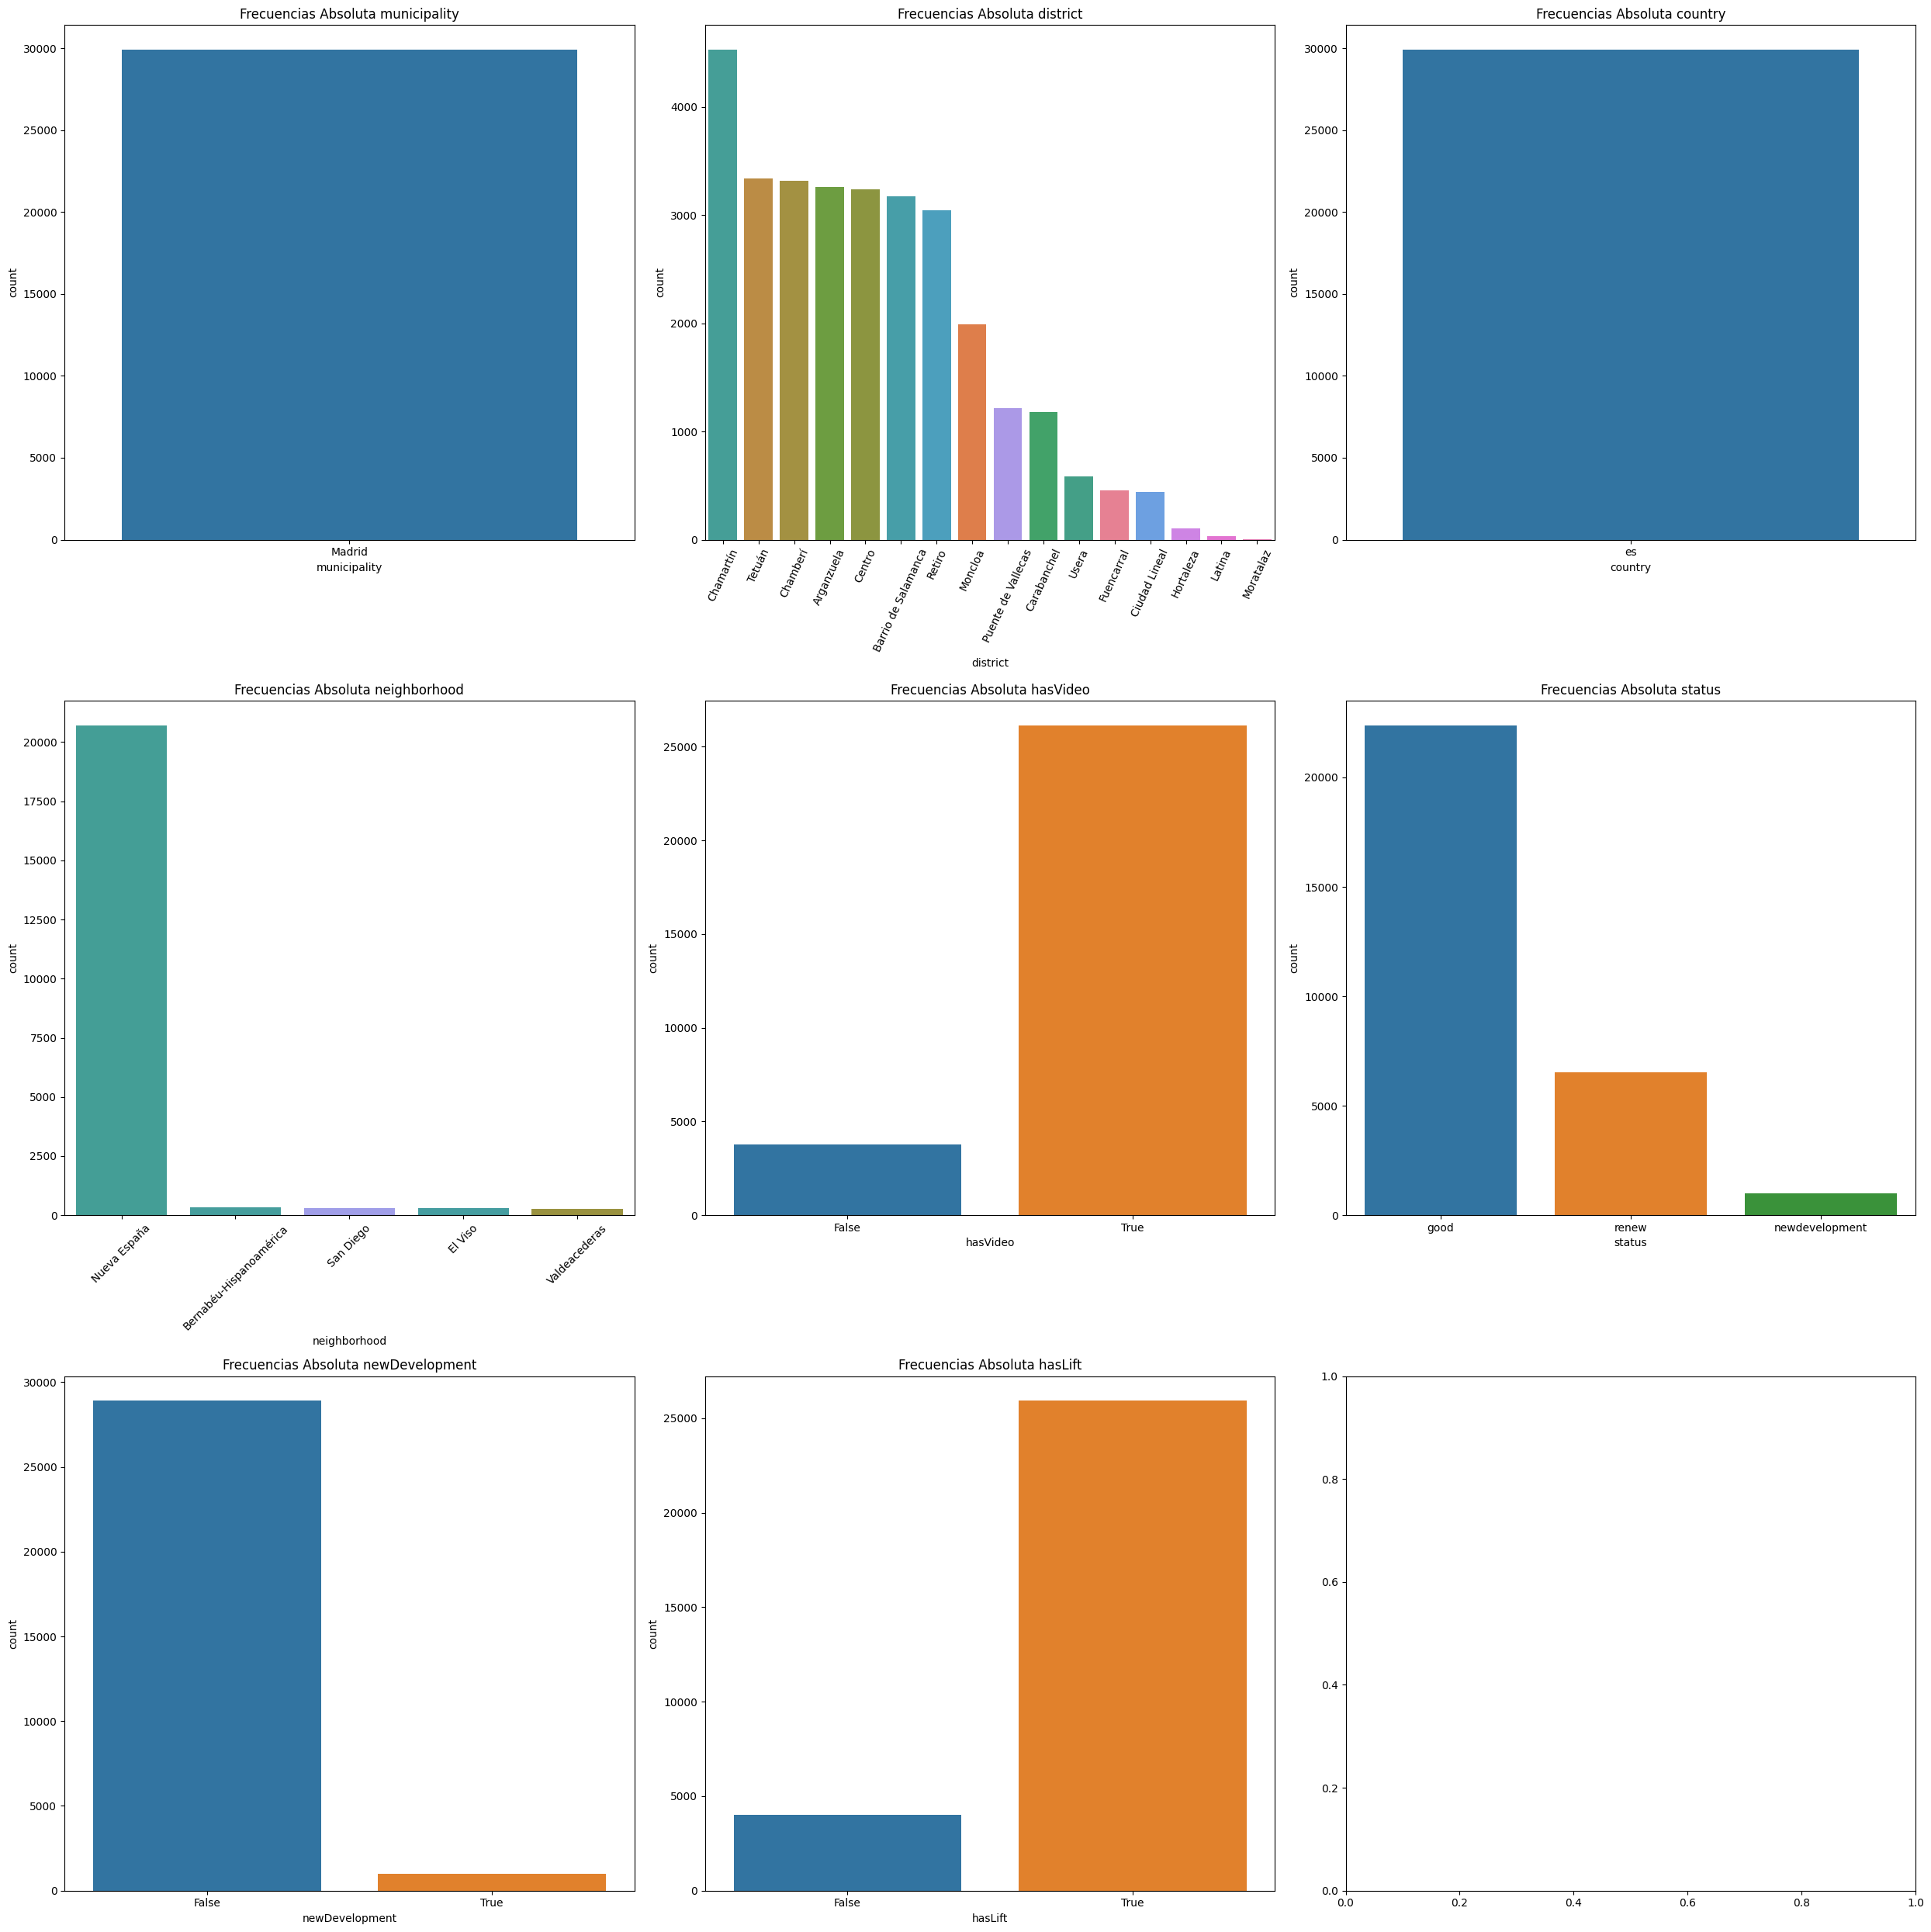

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(25, 25))
axs = axs.flatten()

# Primera figura
sns.countplot(x= "municipality", data= df_raw, hue= "municipality", ax=axs[0], legend=False)
axs[0].set_title("Frecuencias Absoluta municipality")

# Segunda figuraorder=df_raw["district"].value_counts().index
sns.countplot(x="district", data=df_raw, hue= "district", ax=axs[1], , legend=False)
axs[1].set_title("Frecuencias Absoluta district")
axs[1].tick_params(axis='x', rotation=65)

# Tercera figura
sns.countplot(x="country", data=df_raw, hue= "country", ax=axs[2], legend=False)
axs[2].set_title("Frecuencias Absoluta country")

# Cuarta figura
sns.countplot(x="neighborhood", data=df_raw, hue= "neighborhood", ax=axs[3], order=df_raw["neighborhood"].value_counts().index[:5], legend=False)
axs[3].set_title("Frecuencias Absoluta neighborhood")
axs[3].tick_params(axis='x', rotation=45)

# Quinta figura
sns.countplot(x= "hasVideo", data= df_raw, hue= "hasVideo", ax= axs[4], legend= False)
axs[4].set_title("Frecuencias Absoluta hasVideo")

# Sexta figura
sns.countplot(x= "status", data= df_raw, hue= "status", ax= axs[5], legend= False)
axs[5].set_title("Frecuencias Absoluta status")

# Septima figura
sns.countplot(x= "newDevelopment", data= df_raw, hue= "newDevelopment", ax= axs[6], legend= False)
axs[6].set_title("Frecuencias Absoluta newDevelopment")

# Octava figura
sns.countplot(x= "hasLift", data= df_raw, hue= "hasLift", ax= axs[7], legend= False)
axs[7].set_title("Frecuencias Absoluta hasLift")

'''# Novena figura #Solucionar
sns.countplot(x="parkingSpace", data=df_raw, hue= "parkingSpace", ax=axs[8], order=df_raw["parkingSpace"].value_counts().index, legend=False)
axs[8].set_title("Frecuencias Absoluta parkingSpace")
axs[8].tick_params(axis='x', rotation=45)'''

plt.tight_layout()#ajusta automáticamente el espacio entre los subplots
plt.show()



#### Frecuencia relativa

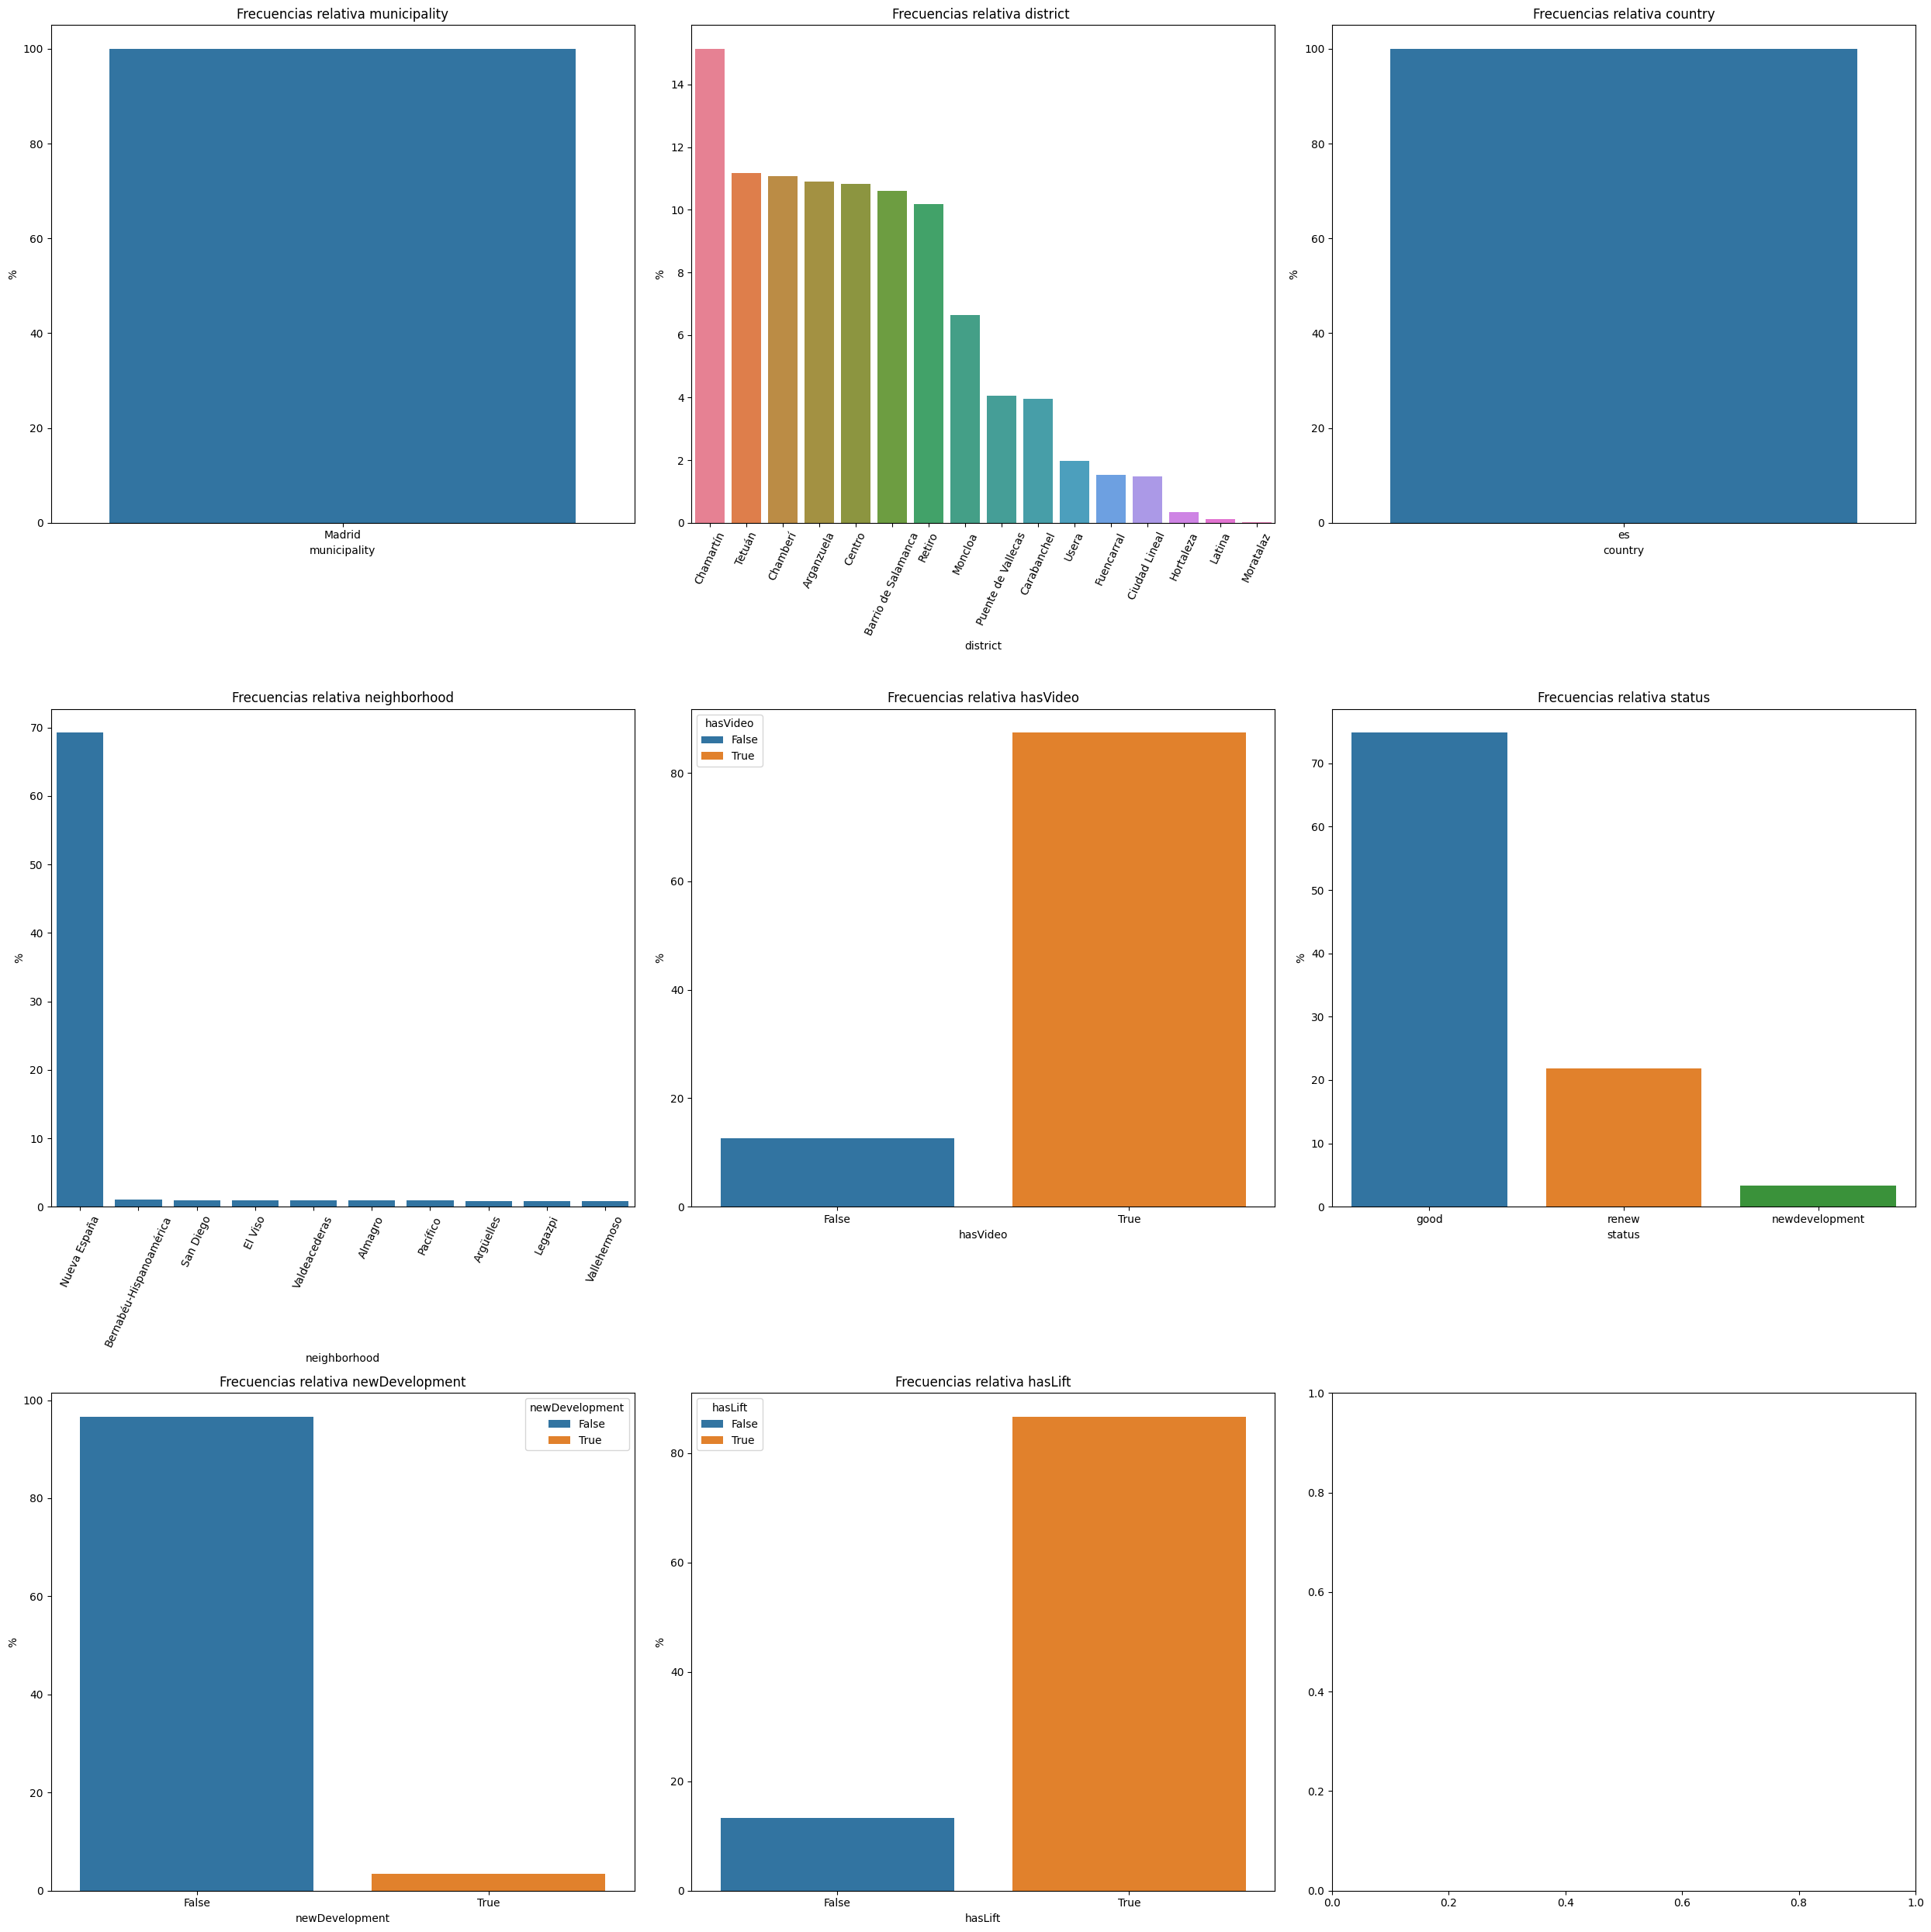

In [296]:
fig, axs = plt.subplots(3, 3, figsize=(25, 25))
axs = axs.flatten()

# Primera figura
valores = df_raw.municipality.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index,  ax = axs[0])
axs[0].set_title("Frecuencias relativa municipality")
axs[0].set_ylabel("%")


# Segunda figura
valores = df_raw.district.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[1])
axs[1].set_title("Frecuencias relativa district ")
axs[1].set_ylabel("%")
axs[1].tick_params(axis='x', rotation=65)


# Tercera figura
valores = df_raw.country.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[2])
axs[2].set_title("Frecuencias relativa country")
axs[2].set_ylabel("%")

# Cuarta figura
valores = df_raw.neighborhood.value_counts(normalize = True) * 100
top_barrios = valores.nlargest(10)
sns.barplot(x=top_barrios.index, y=top_barrios.values, ax = axs[3])
axs[3].set_title("Frecuencias relativa neighborhood")
axs[3].set_ylabel("%")
axs[3].tick_params(axis='x', rotation=65)


# Quinta figura
valores = df_raw.hasVideo.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[4])
axs[4].set_title("Frecuencias relativa hasVideo")
axs[4].set_ylabel("%")

# Sexta figura
valores = df_raw.status.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[5])
axs[5].set_title("Frecuencias relativa status")
axs[5].set_ylabel("%")

# Septima figura
valores = df_raw.newDevelopment.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[6])
axs[6].set_title("Frecuencias relativa newDevelopment")
axs[6].set_ylabel("%")

# Octava figura
valores = df_raw.hasLift.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[7])
axs[7].set_title("Frecuencias relativa hasLift")
axs[7].set_ylabel("%")

# Novena figura #Solucionar
'''
valores = df_raw.parkingSpace.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[8])
axs[8].set_title("Frecuencias relativa parkingSpace")
axs[8].set_ylabel("%")
axs[8].tick_params(axis='x', rotation=65)
'''

plt.tight_layout()#ajusta automáticamente el espacio entre los subplots
plt.show()

#### Análisis numéricas

In [298]:
numéricas.describe()

,Unnamed: 0.1,propertyCode,numPhotos,price,size,rooms,bathrooms,latitude,longitude,priceByArea,ex
count,29922.000000,2.991700e+04,9571.000000,2.991700e+04,29917.000000,29917.000000,29917.000000,29917.000000,29917.000000,29917.000000,2394.000000
mean,14960.500000,1.009765e+08,34.979939,9.317014e+05,151.045158,3.012869,2.242304,40.429559,-3.693117,5755.485410,598.000418
std,8637.881714,5.056693e+06,14.364912,9.389314e+05,107.973340,1.414001,1.236351,0.025776,0.017125,2456.897076,345.616931
min,0.000000,2.809747e+07,0.000000,6.000000e+04,21.000000,0.000000,0.000000,40.381682,-3.725622,911.000000,0.000000
25%,7480.250000,1.004437e+08,26.000000,3.650000e+05,82.000000,2.000000,1.000000,40.407449,-3.707502,4138.000000,299.000000
50%,14960.500000,1.015064e+08,33.000000,6.350000e+05,120.000000,3.000000,2.000000,40.429514,-3.693813,5210.000000,598.000000
75%,22440.750000,1.029084e+08,43.000000,1.150000e+06,185.000000,4.000000,3.000000,40.452235,-3.677504,6846.000000,897.000000
max,29921.000000,1.046568e+08,108.000000,1.180000e+07,995.000000,18.000000,20.000000,40.477295,-3.661150,18689.000000,1197.000000


##### IQR

In [312]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)
for col in numéricas.columns:
    print(col, get_IQR(df_raw, col))

Unnamed: 0.1 14960.5
propertyCode 2464625.0
numPhotos 0.0
price 785000.0
size 103.0
rooms 2.0
bathrooms 2.0
latitude 0.04478590000000082
longitude 0.029981224999999778
priceByArea 2708.0
ex 0.0


##### Rangos

In [299]:
numéricas.describe().loc["max"] - numéricas.describe().loc["min"]

Unnamed: 0.1    2.992100e+04
propertyCode    7.655931e+07
numPhotos       1.080000e+02
price           1.174000e+07
size            9.740000e+02
rooms           1.800000e+01
bathrooms       2.000000e+01
latitude        9.561330e-02
longitude       6.447250e-02
priceByArea     1.777800e+04
ex              1.197000e+03
dtype: float64

##### CV

In [311]:
# Obtenemos sus CV con una función
def get_CV(df_raw, columna):
    # Si columna es un DataFrame lo convierte en una lista de nombres
    if isinstance(columna, pd.DataFrame):
        columna = columna.columns.tolist()
    
    desc = df_raw[columna].describe().T
    return desc["std"] / desc["mean"] * 100

get_CV(df_raw, numéricas)


Unnamed: 0.1     57.737921
propertyCode      5.007376
numPhotos        23.224792
price           100.767586
size             71.478172
rooms            46.928135
bathrooms        55.132944
latitude          0.063751
longitude        -0.463674
priceByArea      42.684354
ex               16.344695
dtype: float64

##### Distribución: Histrogramas, Funciones Densidad (KDE)

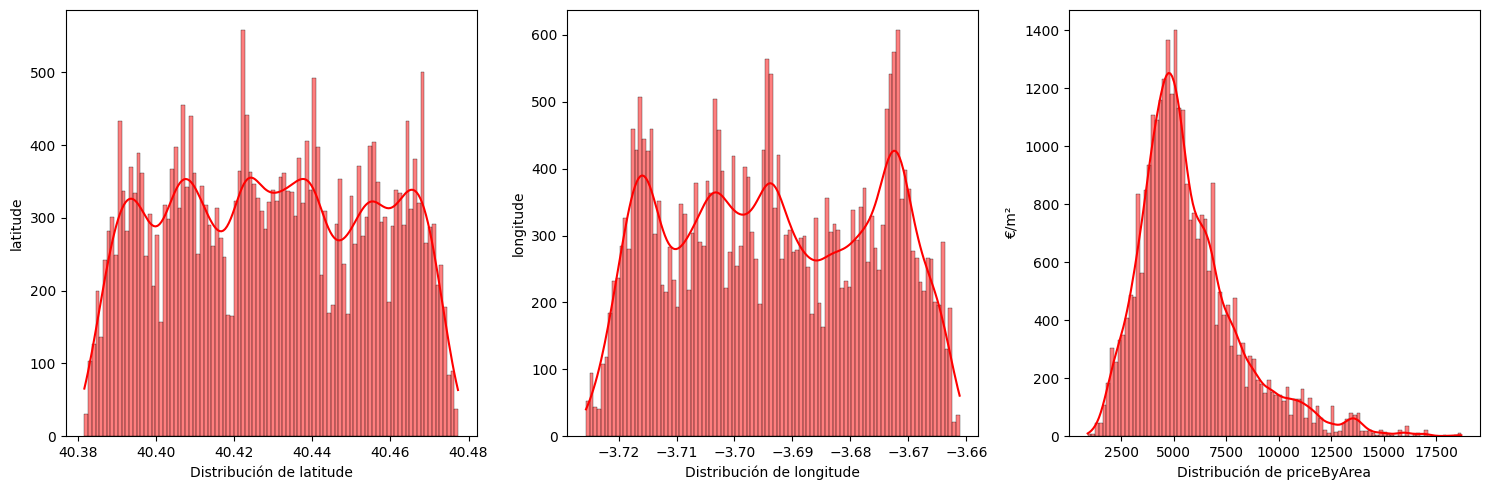

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs = axs.flatten()

# Primera figura
sns.histplot(df_raw["latitude"],
             kde=True,
             color='r',
             bins=100, ax = axs[0]) 
axs[0].set_xlabel("Distribución de latitude")
axs[0].set_ylabel("latitude")

# Segunda figura
sns.histplot(df_raw["longitude"],
             kde=True,
             color='r',
             bins=100, ax = axs[1]) 
axs[1].set_xlabel("Distribución de longitude")
axs[1].set_ylabel("longitude")

# Tercera figura
sns.histplot(df_raw["priceByArea"],
             kde=True,
             color='r',
             bins=100, ax = axs[2]) 
axs[2].set_xlabel("Distribución de priceByArea")
axs[2].set_ylabel("€/m²")

plt.tight_layout()#ajusta automáticamente el espacio entre los subplots
plt.show()

##### Boxplot

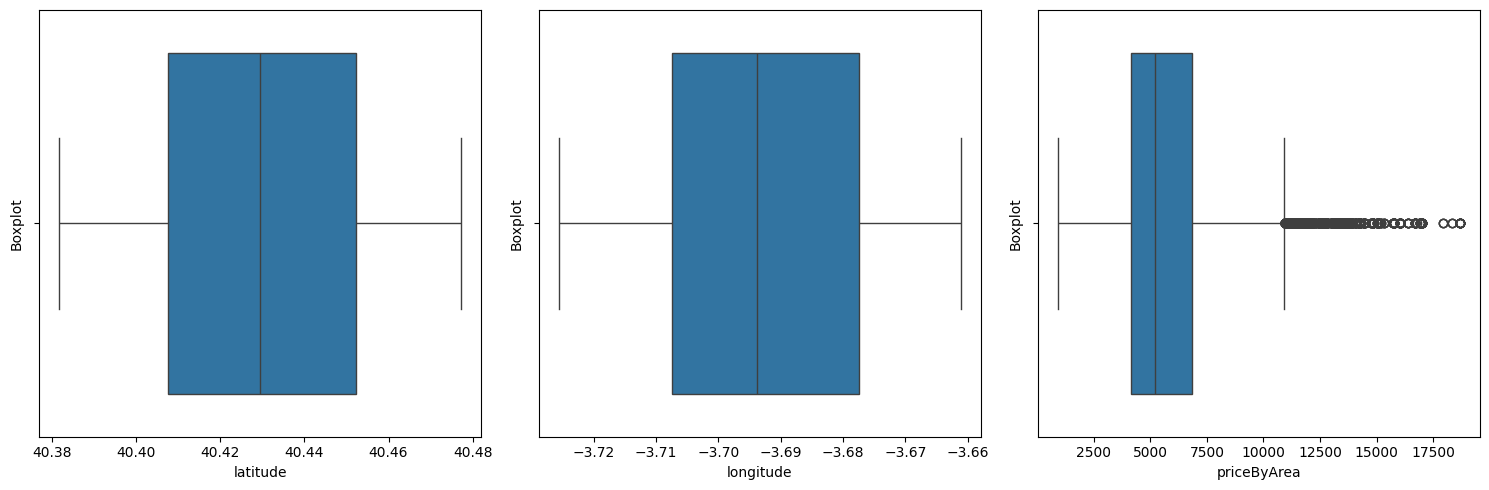

In [328]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs = axs.flatten()

# Primera figura
sns.boxplot(x = "latitude", data = df_raw, ax= axs[0])
axs[0].set_xlabel("latitude")
axs[0].set_ylabel("Boxplot")

# Segunda figura
sns.boxplot(x = "longitude", data = df_raw, ax= axs[1])
axs[1].set_xlabel("longitude")
axs[1].set_ylabel("Boxplot")

# Tercera figura
sns.boxplot(x = "priceByArea", data = df_raw, ax= axs[2])
axs[2].set_xlabel("priceByArea")
axs[2].set_ylabel("Boxplot")

plt.tight_layout()
plt.show()